In [1]:
import pandas as pd
import numpy as np
import csv
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import datetime as dt

In [2]:
import seaborn

In [3]:
year = ['2018', '2019', '2020']
month = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [4]:
yyyymm = []
for i in range(len(year)):
    if i == 2:
        for j in range(len(month) - 3):
            yyyymm.append(year[i] + month[j])
    else:
        for j in range(len(month)):
            yyyymm.append(year[i] + month[j])

# 불러오기

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [ ]:
%cd gdrive/MyDrive/colab_ML_KDK

In [ ]:
path = './관광공사/'

In [ ]:
test = pd.read_csv(path + 'MainCountry_TimeSeries_Tourist.csv', delimiter = ',')

In [ ]:
China_Time_Series = test[test['Country'] == 'China']
Japan_Time_Series = test[test['Country'] == 'Japan']
USA_Time_Series = test[test['Country'] == 'USA']
Total_Country_Time_Series = test[test['Country'] == 'Total']

In [ ]:
China_Time_Series = China_Time_Series.drop(['Unnamed: 0'], axis=1)
Japan_Time_Series = Japan_Time_Series.drop(['Unnamed: 0'], axis=1)
USA_Time_Series = USA_Time_Series.drop(['Unnamed: 0'], axis=1)
Total_Country_Time_Series = Total_Country_Time_Series.drop(['Unnamed: 0'], axis=1)

In [ ]:
China_Time_Series[['yyyymm', 'Count']]

,yyyymm,Count
0,201001,93535
1,201002,143944
2,201003,146838
3,201004,150517
4,201005,157239
...,...,...
124,202005,6375
125,202006,6343
126,202007,11143
127,202008,17160


In [ ]:
China_Time_Series['Count'].astype((float))

0       93535.0
1      143944.0
2      146838.0
3      150517.0
4      157239.0
         ...   
124      6375.0
125      6343.0
126     11143.0
127     17160.0
128     16157.0
Name: Count, Length: 129, dtype: float64

In [ ]:
Monthly = pd.date_range('2010-01-01', periods=129, freq='M')

In [ ]:
China_Time_Series.index = Monthly
Japan_Time_Series.index = Monthly
USA_Time_Series.index = Monthly
Total_Country_Time_Series.index = Monthly

In [ ]:
Cities = pd.read_csv(path + 'MetroCity_TimeSeries_Tourist.csv', delimiter = ',')

In [ ]:
Cities = Cities.drop(['Unnamed: 0'], axis=1)

In [ ]:
Seoul_Time_Series = Cities[Cities['City'] == 'Seoul']
Suwon_Time_Series = Cities[Cities['City'] == 'Suwon']
Incheon_Time_Series = Cities[Cities['City'] == 'Incheon']
Jeju_Time_Series = Cities[Cities['City'] == 'Jeju']
Busan_Time_Series = Cities[Cities['City'] == 'Busan']

In [ ]:
City_Monthly = pd.date_range('2018-01-01', periods=34, freq='M')

In [ ]:
City_Monthly

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
Seoul_Time_Series.index = City_Monthly
Suwon_Time_Series.index = City_Monthly
Incheon_Time_Series.index = City_Monthly
Jeju_Time_Series.index = City_Monthly
Busan_Time_Series.index = City_Monthly

In [ ]:
Total_Country_Daily = pd.read_csv(path + 'tourist_daily.csv')

In [ ]:
Daily = np.arange('2010-01-01', '2020-10-01', dtype='datetime64[D]')

In [ ]:
Total_Country_Daily.index = Daily

In [ ]:
Total_Country_Entry = Total_Country_Daily['Total_entry']

# 통계

### 국가별 주요 5 도시 방문자 수 추이

In [ ]:
City_per_country = pd.read_csv(path + 'MetroCity_TimeSeries_Country_Tourist.csv', delimiter = ',')

In [ ]:
City_per_country.drop('Unnamed: 0', axis=1)

,yyyymm,Country,City,Count
0,201801,China,Seoul,448313.692652
1,201801,Japan,Seoul,213190.259894
2,201801,USA,Seoul,53981.956396
3,201802,China,Seoul,548871.984349
4,201802,Japan,Seoul,191674.883084
...,...,...,...,...
505,202009,Japan,Suwon,1488.950912
506,202009,USA,Suwon,2014.415561
507,202010,China,Suwon,4402.197817
508,202010,Japan,Suwon,814.299337


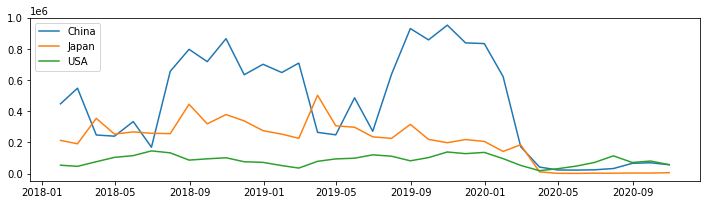

In [ ]:
plt.figure(figsize=(12, 3))
plt.plot(City_Monthly, City_per_country[(City_per_country['Country'] == 'China') &(City_per_country['City'] == 'Seoul')].Count, label='China')
plt.plot(City_Monthly, City_per_country[(City_per_country['Country'] == 'Japan') &(City_per_country['City'] == 'Seoul')].Count, label='Japan')
plt.plot(City_Monthly, City_per_country[(City_per_country['Country'] == 'USA') &(City_per_country['City'] == 'Seoul')].Count, label='USA')

plt.legend(loc='upper left')
plt.show()

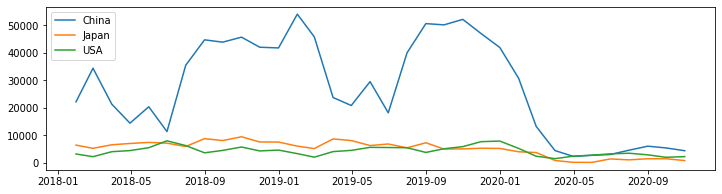

In [ ]:
plt.figure(figsize=(12, 3))
plt.plot(City_Monthly, City_per_country[(City_per_country['Country'] == 'China') &(City_per_country['City'] == 'Suwon')].Count, label='China')
plt.plot(City_Monthly, City_per_country[(City_per_country['Country'] == 'Japan') &(City_per_country['City'] == 'Suwon')].Count, label='Japan')
plt.plot(City_Monthly, City_per_country[(City_per_country['Country'] == 'USA') &(City_per_country['City'] == 'Suwon')].Count, label='USA')

plt.legend(loc='upper left')
plt.show()

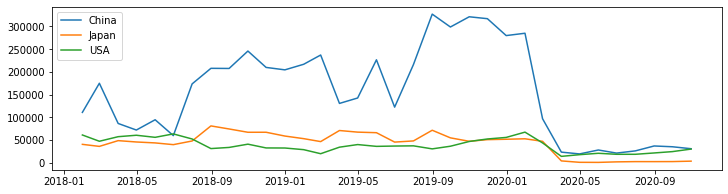

In [ ]:
plt.figure(figsize=(12, 3))
plt.plot(City_Monthly, City_per_country[(City_per_country['Country'] == 'China') &(City_per_country['City'] == 'Incheon')].Count, label='China')
plt.plot(City_Monthly, City_per_country[(City_per_country['Country'] == 'Japan') &(City_per_country['City'] == 'Incheon')].Count, label='Japan')
plt.plot(City_Monthly, City_per_country[(City_per_country['Country'] == 'USA') &(City_per_country['City'] == 'Incheon')].Count, label='USA')

plt.legend(loc='upper left')
plt.show()

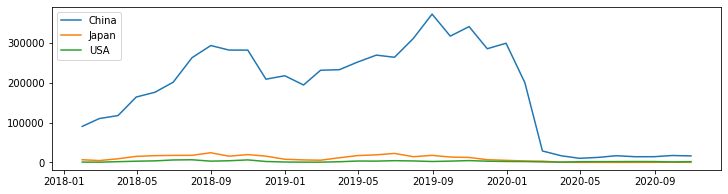

In [ ]:
plt.figure(figsize=(12, 3))
plt.plot(City_Monthly, City_per_country[(City_per_country['Country'] == 'China') &(City_per_country['City'] == 'Jeju')].Count, label='China')
plt.plot(City_Monthly, City_per_country[(City_per_country['Country'] == 'Japan') &(City_per_country['City'] == 'Jeju')].Count, label='Japan')
plt.plot(City_Monthly, City_per_country[(City_per_country['Country'] == 'USA') &(City_per_country['City'] == 'Jeju')].Count, label='USA')

plt.legend(loc='upper left')
plt.show()

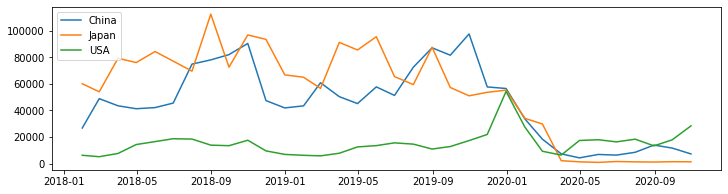

In [ ]:
plt.figure(figsize=(12, 3))
plt.plot(City_Monthly, City_per_country[(City_per_country['Country'] == 'China') &(City_per_country['City'] == 'Busan')].Count, label='China')
plt.plot(City_Monthly, City_per_country[(City_per_country['Country'] == 'Japan') &(City_per_country['City'] == 'Busan')].Count, label='Japan')
plt.plot(City_Monthly, City_per_country[(City_per_country['Country'] == 'USA') &(City_per_country['City'] == 'Busan')].Count, label='USA')

plt.legend(loc='upper left')
plt.show()



*   인천, 제주, 수원은 중국인 관광객들의 비중이 매우 높음
*   서울 역시 중국인 관광객들이 비중이 높고, 부산은 일본인 관광객과 중국인 관광객들의 비중이 비슷함
*   무슨 이유인지는 모르겠으나 수도권 지역 (서울, 인천, 수원) 지역을 방문한 중국인 수가 2019년 4월 ~ 7월 사이에 급락함



# 시계열 분해 (Trend와 Seasonality를 파악)
*   시계열 분해 모델
*   additive -> 가법 모형: 추세 + 계절성 + 잔차로 표현
*   multiplicative -> 승법 모형: 추세 * 계절성 * 잔차로 표현



**모델간 차이**
*   가법 모형은 frequency와 trend가 다르다, 장기간의 분석에서는 seasonal data 결과는 트렌드를 따라가지 못해서 적합하지 않다.

*   승법 모형은 모델은 분해값들의 곱인 비율로 이루어져 있어서 트렌드에 맞게 seasonal 데이터가 변화한다.


*   본 데이터들에 대해선 두 모형들이 거의 차이가 없어서 그냥 additive (가법 모형)으로 함

In [ ]:
China_STL = seasonal_decompose(China_Time_Series['Count'], model='additive', two_sided=False)
Japan_STL = seasonal_decompose(Japan_Time_Series['Count'], model='additive', two_sided=False)
USA_STL = seasonal_decompose(USA_Time_Series['Count'], model='additive', two_sided=False)
Total_Country_STL = seasonal_decompose(Total_Country_Time_Series['Count'], model='additive', two_sided=False)

Total_Country_Daily_STL = seasonal_decompose(Total_Country_Entry, model='additive')
# residual = res.resid
# seasonal = res.seasonal 
# trend = res.trend

In [ ]:
tot_avg = Total_Country_STL.resid.mean()
tot_std = Total_Country_STL.resid.std()

In [ ]:
Total_Country_STL.resid

2010-01-31             NaN
2010-02-28             NaN
2010-03-31             NaN
2010-04-30             NaN
2010-05-31             NaN
                  ...     
2020-05-31   -1.046473e+06
2020-06-30   -9.170060e+05
2020-07-31   -8.237948e+05
2020-08-31   -8.431149e+05
2020-09-30   -6.305042e+05
Freq: M, Name: Count, Length: 129, dtype: float64

## 국가별 (전체, 미국, 일본, 중국)

*   국가별 데이터는 2010년 1월 ~ 2020년 9월 총 129개월 데이터 존재

*   그래프에서 단기적인 이벤트는 Residual에 반영이 되고, 장기적인 이벤트는 Trend에 반영이 된다.

### 전체

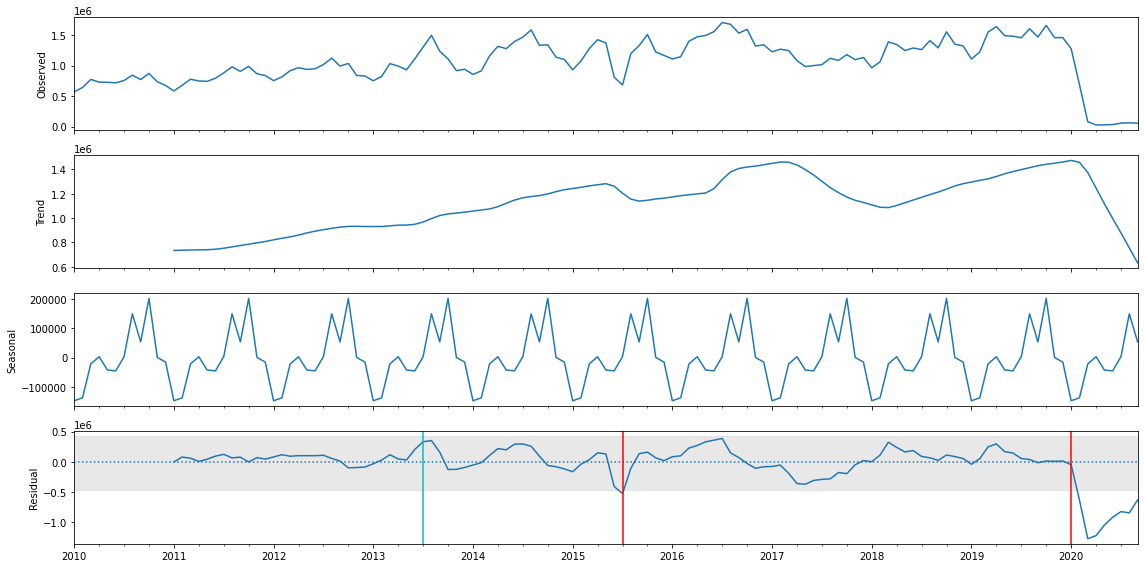

In [ ]:
plt.rcParams['figure.figsize'] = [16, 8]
Total_Country_STL.plot()
plt.axhline(0, ls=':')
plt.axvline('2013-07', c = 'c')
plt.axvline('2015-07', c = 'r')
plt.axvline('2020-01', c = 'r')
plt.axhspan(tot_avg + (1.5 * tot_std), tot_avg - (1.5 * tot_std), alpha=0.5, color='lightgrey')
plt.show()

### 전체

*   하단의 중국 그래프와 많이 비슷함. 중국인들이 관광객 수의 대부분을 차지해서 그런듯
*   주로 늦여름이나 가을에 많이 방문한다.
*   메르스 기간 (2015년 여름)에는 관광객들 수가 급락함


### 중국

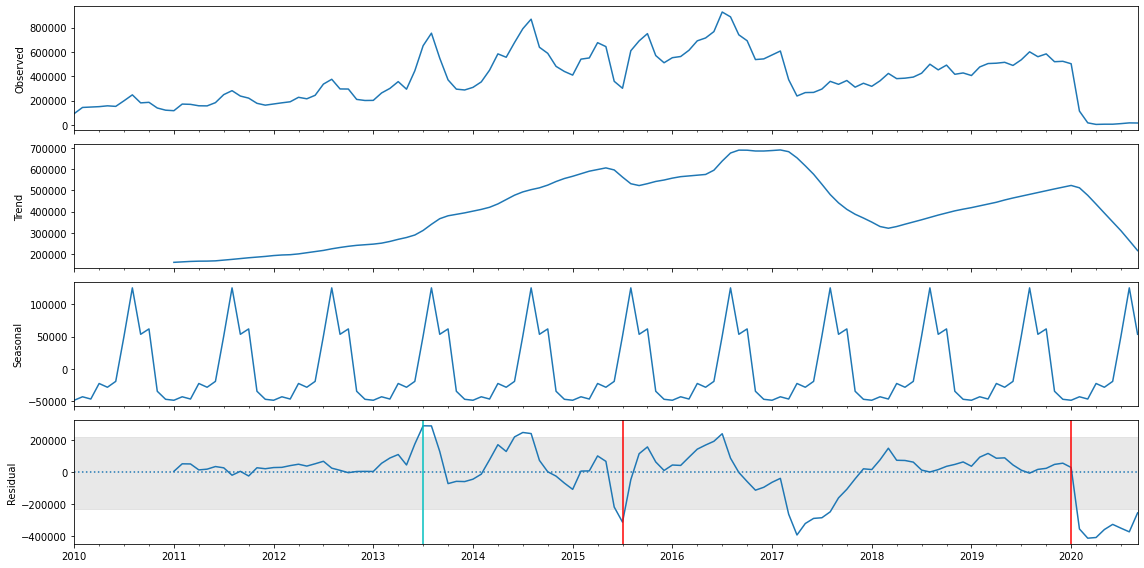

In [ ]:
plt.rcParams['figure.figsize'] = [16, 8]
China_STL.plot()
plt.axhline(0, ls=':')
plt.axvline('2013-07', c = 'c')
plt.axvline('2015-07', c = 'r')
plt.axvline('2020-01', c = 'r')

avg = China_STL.resid.mean()
std = China_STL.resid.std()
plt.axhspan(avg + (1.5 * std), avg - (1.5 * std), alpha=0.5, color='lightgrey')

plt.show()

### 중국
*   추세: 2016년까지 전체적으로 증가하나, 2017년에 갑자기 떨어짐. (한중 외교관계 악화 때문인듯)
*   계절성: 주로 7~8월에 몰려서 온다
*   비고: 2015년 여름에는 다른 해 여름보다 적게 왔음 (메르스), 2020년 2월쯤 갑자기 떨어짐, (코로나)

### 일본

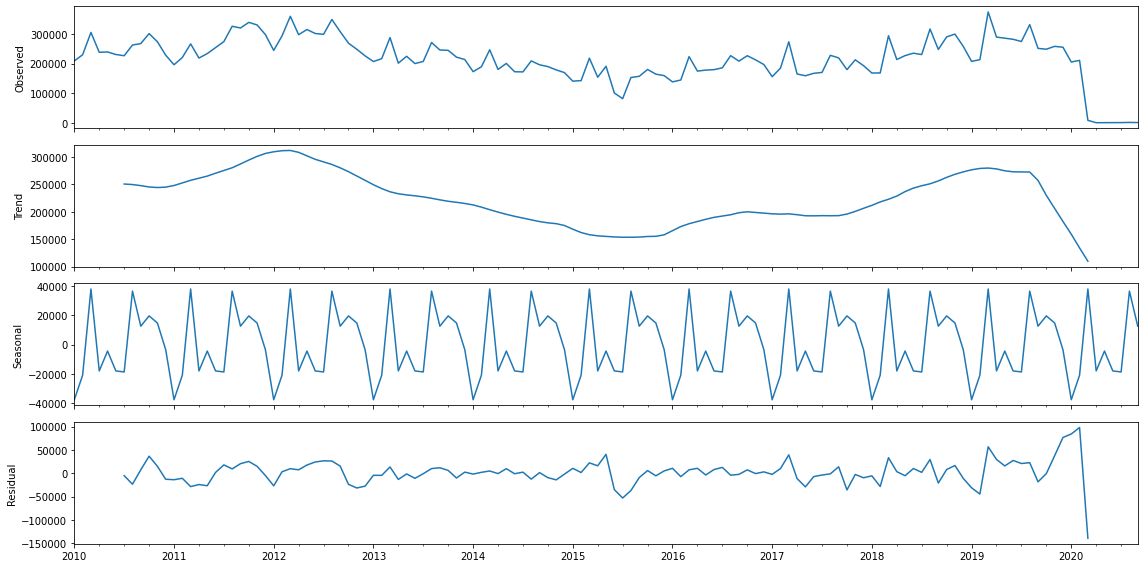

In [ ]:
plt.rcParams['figure.figsize'] = [16, 8]
Japan_STL.plot()
plt.show()

### 일본
*   추세: 2012년 중반부터 지속적으로 감소, 2017년 중반부터 약간씩 증가
*   계절성: 봄에는 다른 때보다 적게 온다
*   비고: 2020년 2월쯤 갑자기 떨어짐 (코로나)

### 미국

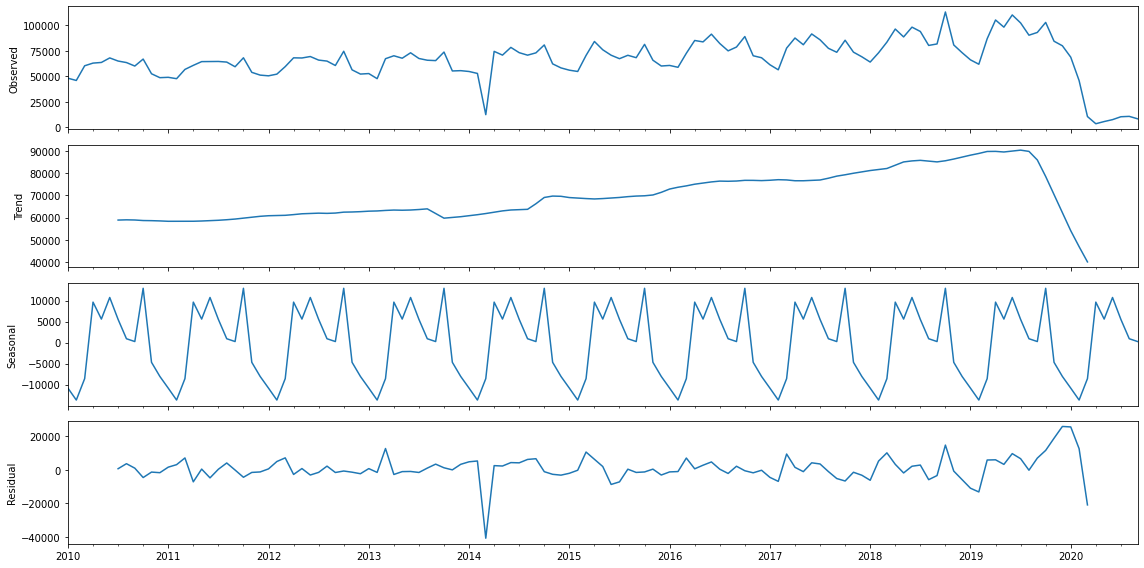

In [ ]:
plt.rcParams['figure.figsize'] = [16, 8]
USA_STL.plot()
plt.show()

### 미국
*   추세: 꾸준히 증가
*   계절성: 여름에 다른 때보다 적게 온다
*   비고: 2014년 3월쯤 갑자기 떨어진 구간이 있음. 2020년 1월쯤 갑자기 떨어짐 (코로나)

## 지역별 (서울, 수원(경기도), 인천, 제주(제주도), 부산)

*   지역별 데이터는 2018년 1월 ~ 2020년 10월 총 34개월 데이터 존재

In [ ]:
Seoul_STL = seasonal_decompose(Seoul_Time_Series['Count'], model='additive')
Suwon_STL = seasonal_decompose(Suwon_Time_Series['Count'], model='additive')
Incheon_STL = seasonal_decompose(Incheon_Time_Series['Count'], model='additive')
Jeju_STL = seasonal_decompose(Jeju_Time_Series['Count'], model='additive')
Busan_STL = seasonal_decompose(Busan_Time_Series['Count'], model='additive')

### 서울

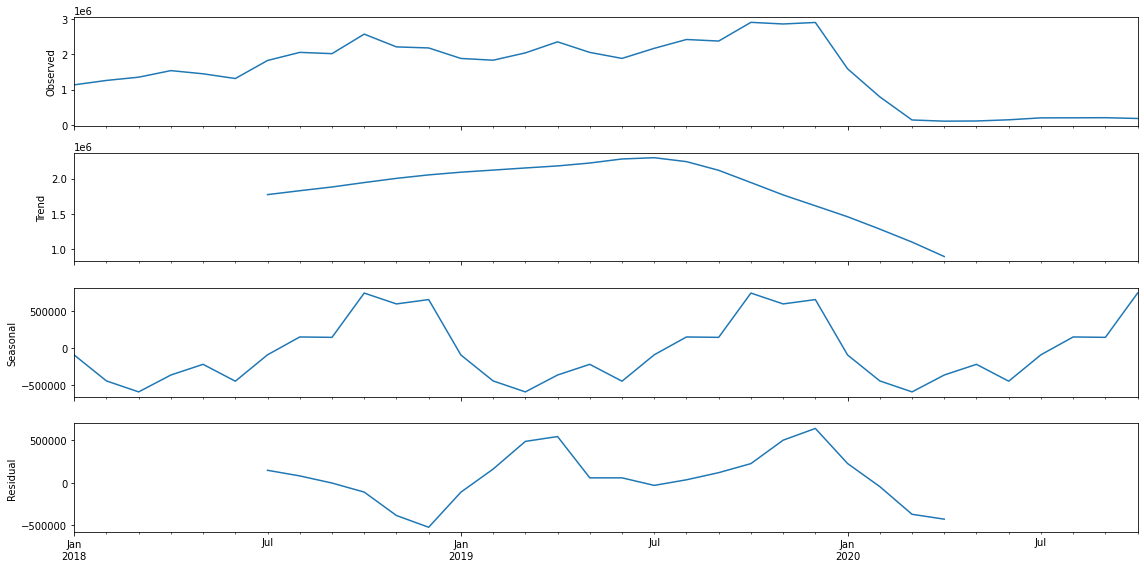

In [ ]:
plt.rcParams['figure.figsize'] = [16, 8]
Seoul_STL.plot()
plt.show()

### 수원

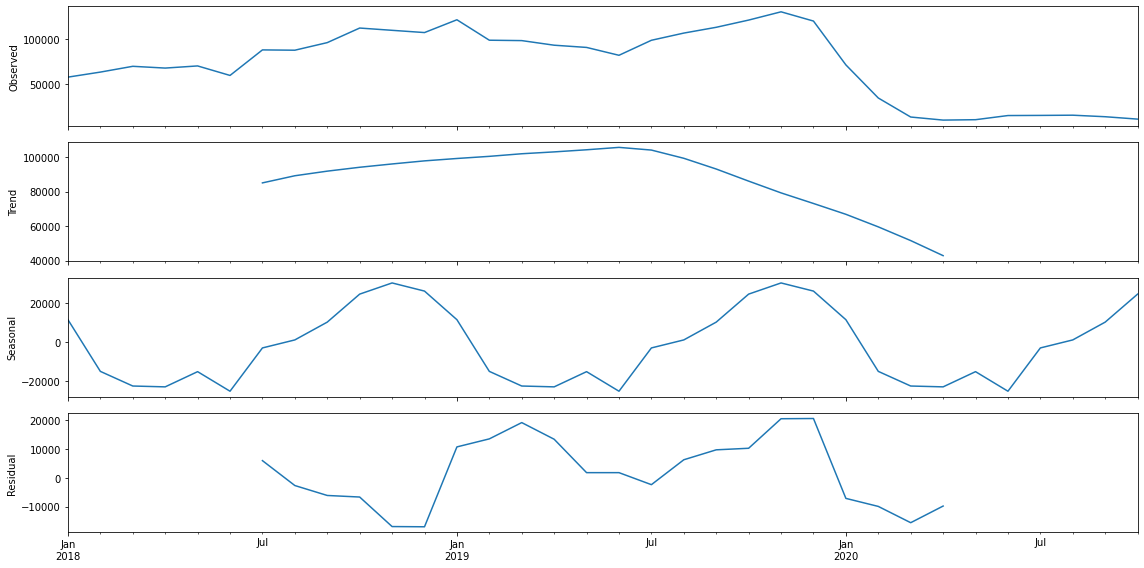

In [ ]:
plt.rcParams['figure.figsize'] = [16, 8]
Suwon_STL.plot()
plt.show()

### 인천

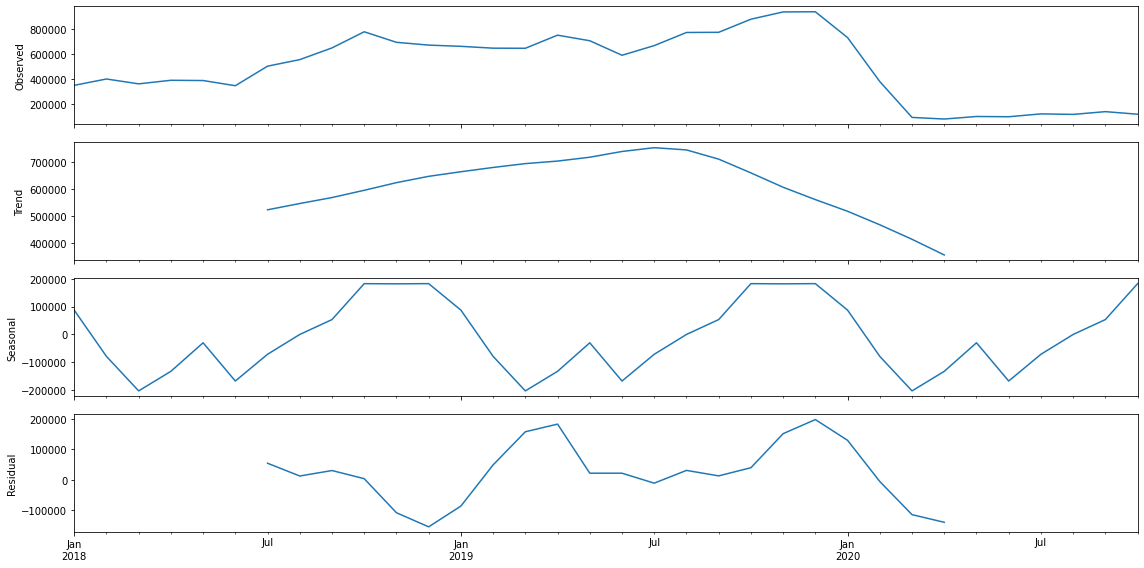

In [ ]:
plt.rcParams['figure.figsize'] = [16, 8]
Incheon_STL.plot()
plt.show()

### 제주

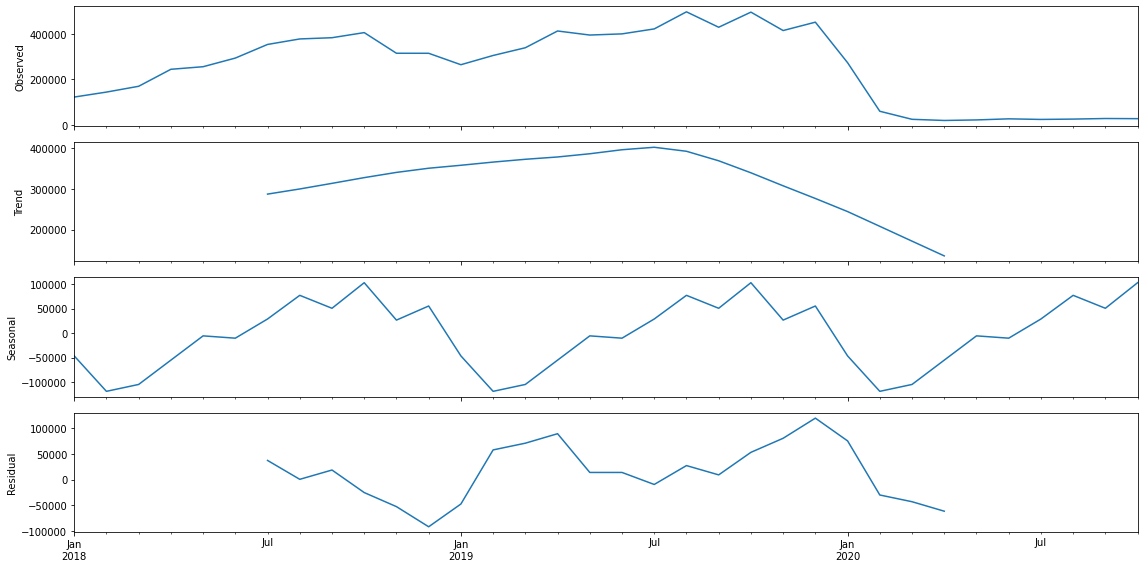

In [ ]:
plt.rcParams['figure.figsize'] = [16, 8]
Jeju_STL.plot()
plt.show()

### 부산

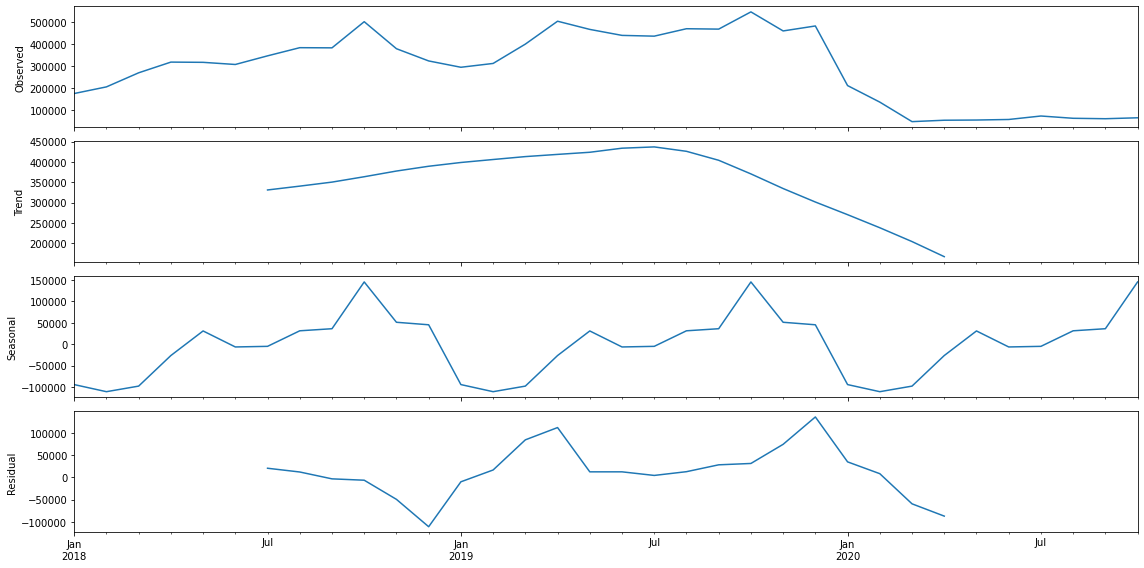

In [ ]:
plt.rcParams['figure.figsize'] = [16, 8]
Busan_STL.plot()
plt.show()

**지역별 추이 분석**

*   전체적으로 그래프 모양이 비슷하다
*   꾸준히 증가하는 추세를 보이다 2020년을 기점으로 급격하게 떨어진다
*   뚜렷하게 나타나는 계절성은 없다 (다섯 도시 모두 연말을 기준으로 계절성을 보이는데 이는 코로나 데이터가 영향을 줬을거라 생각함)
*   비고: 구간이 다소 짧아서 (약 3년) 추세, 계절성 파악이 어렵다

# 월간 환율, 유가, 코스피, GDP 데이터 불러오기

*   환율은 원/외화 및 외화/1000원, 유가(WTI)는 US달러/배럴, GDP는 백만 US 달러 

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [ ]:
import statsmodels.tsa.stattools as ts

In [ ]:
#Ex_rate = [f for f in glob.glob("./Ex_rate" + "**/*.xlsx", recursive=True)]
Oil_price = pd.read_csv('./관광공사/WTISPLC.csv')
KOSPI = pd.read_excel('./관광공사/KOSPI_month_processed.xlsx', thousands=',')
GDP = pd.read_excel('./관광공사/Monthly_GDP.xlsx')

In [ ]:
ctr_year = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
ctr_yyyymm = []
for i in range(len(ctr_year)):
    if i == 10:
        for j in range(len(month) - 3):
            ctr_yyyymm.append(ctr_year[i] + month[j])
    else:
        for j in range(len(month)):
            ctr_yyyymm.append(ctr_year[i] + month[j])

### 환율 데이터 전처리
*   월간 환율 데이터 중 원/외화 데이터만 뽑음

In [ ]:
China_Ex_rate = pd.read_excel('./관광공사/China_Exchange_Rate.xlsx')
Japan_Ex_rate = pd.read_excel('./관광공사/Japan_Exchange_Rate.xlsx')
USA_Ex_rate = pd.read_excel('./관광공사/America_Exchange_Rate.xlsx')

In [ ]:
China_Ex_rate.iloc[0]['일자'] = 'yyyymm'
China_Ex_rate.columns = China_Ex_rate.iloc[0]
China_Ex_rate = China_Ex_rate.drop(0)
China_Ex_rate = China_Ex_rate.iloc[::-1]

Japan_Ex_rate.iloc[0]['일자'] = 'yyyymm'
Japan_Ex_rate.columns = Japan_Ex_rate.iloc[0]
Japan_Ex_rate = Japan_Ex_rate.drop(0)
Japan_Ex_rate = Japan_Ex_rate.iloc[::-1]

USA_Ex_rate.iloc[0]['일자'] = 'yyyymm'
USA_Ex_rate.columns = USA_Ex_rate.iloc[0]
USA_Ex_rate = USA_Ex_rate.drop(0)
USA_Ex_rate = USA_Ex_rate.iloc[::-1]

In [ ]:
China_Ex_rate.index = Monthly
Japan_Ex_rate.index = Monthly
USA_Ex_rate.index = Monthly

In [ ]:
China_Ex_rate['yyyymm'] = ctr_yyyymm
Japan_Ex_rate['yyyymm'] = ctr_yyyymm
USA_Ex_rate['yyyymm'] = ctr_yyyymm

### 유가 데이터 전처리
*    전체 데이터 중 2010년 1월 데이터부터 보기로 함

In [ ]:
Oil_price = Oil_price.iloc[72:-1]
Oil_price.index = Monthly

### 코스피 전처리
*   전처리할 내용이 따로 없어서 그냥 월단위만 집어넣음

In [ ]:
KOSPI.index = Monthly

### GDP 전처리

**IMF에서 추정한 2020년 GDP를 추가함**
*   감소한 걸 보니 코로나의 영향을 반영하여 근래에 자료를 내놓은듯


*   중국: 14860775
*   일본: 4910580
*   미국: 20807269

**월간 GDP 자료는 없기 때문에 연간 GDP 자료를 12로 나누어서 월마다 동일하게 분배**

*   GDP는 월별로 계절성을 띄지 않는다고 가정함

In [ ]:
GDP_Monthly = pd.DataFrame(index=Monthly, columns=['yyyymm', 'China', 'Japan', 'USA'])

In [ ]:
trace_2020 = [14860775, 4910580, 20807269] #중국, 미국, 일본 GDP (2020년 추론)

In [ ]:
GDP_China = pd.DataFrame(GDP['중국'][10:])
GDP_Japan = pd.DataFrame(GDP['일본'][10:])
GDP_USA = pd.DataFrame(GDP['미국'][10:])

In [ ]:
rownum = 0
for i in range(len(ctr_year)):
    if i == 10:
        for j in range(9):
            GDP_Monthly['China'][rownum] = trace_2020[0]
            GDP_Monthly['Japan'][rownum] = trace_2020[1]
            GDP_Monthly['USA'][rownum] = trace_2020[2]
            rownum += 1
    else:
        for j in range(12):
            GDP_Monthly['China'][rownum] = GDP_China['중국'][i + 10]
            GDP_Monthly['Japan'][rownum] = GDP_Japan['일본'][i + 10]
            GDP_Monthly['USA'][rownum] = GDP_USA['미국'][i + 10]
            rownum += 1

In [ ]:
GDP_Monthly['yyyymm'] = ctr_yyyymm

# 국가별 경제적 독립변수들에 대한 상관성 분석
*   각 국가별로 경제 요인이 얼마나 영향을 미치는지 확인

## 데이터 합치기

### 중국 
*   관광객 수, 원/위안 환율, 유가, GDP, 코스피

In [ ]:
China_Total_data = pd.DataFrame(index=Monthly, columns=['Ex_rate', 'WTI', 'GDP', 'KOSPI', 'Count'])

In [ ]:
China_Total_data['Ex_rate'] = China_Ex_rate['원/1위안'].astype(float)
China_Total_data['WTI'] = Oil_price['WTISPLC'].astype(float)
China_Total_data['GDP'] = GDP_Monthly['China'].astype(float)
China_Total_data['KOSPI'] = KOSPI['현재지수'].astype(float)
China_Total_data['Count'] = China_Time_Series['Count'].astype(float)

### 일본

*   관광객 수, 원/100엔 환율, 유가, GDP, 코스피



In [ ]:
Japan_Total_data = pd.DataFrame(index=Monthly, columns=['Ex_rate', 'WTI', 'GDP', 'KOSPI', 'Count'])

In [ ]:
Japan_Total_data['Ex_rate'] = Japan_Ex_rate['원/100엔'].astype(float)
Japan_Total_data['WTI'] = Oil_price['WTISPLC'].astype(float)
Japan_Total_data['GDP'] = GDP_Monthly['Japan'].astype(float)
Japan_Total_data['KOSPI'] = KOSPI['현재지수'].astype(float)
Japan_Total_data['Count'] = Japan_Time_Series['Count'].astype(float)

### 미국

*   관광객 수, 원/달러 환율, 유가, GDP, 코스피



In [ ]:
USA_Total_data = pd.DataFrame(index=Monthly, columns=['Ex_rate', 'WTI', 'GDP', 'KOSPI', 'Count'])

In [ ]:
USA_Total_data['Ex_rate'] = USA_Ex_rate['원/달러'].astype(float)
USA_Total_data['WTI'] = Oil_price['WTISPLC'].astype(float)
USA_Total_data['GDP'] = GDP_Monthly['USA'].astype(float)
USA_Total_data['KOSPI'] = KOSPI['현재지수'].astype(float)
USA_Total_data['Count'] = USA_Time_Series['Count'].astype(float)

## 공적분 분석

*   공적분 분석은 두 시계열 데이터 사이에 존재하는 통계적인 특성을 분석하는 방법임
*   허구적 상관관계가 나타남을 방지하고자 추세를 제거하고 난 후의 정상 데이터들간의 비교를 진행함


*   모든 변수들 간에 공적분 관계가 존재하는지를 검정하여 유의미한 변수 쌍이 있는지 조사
*   **변수 간 장기적으로 상관성이 있는지에 대해 확인할 수 있음**

**Coint 함수**

*   "공적분 관계가 없다"를 귀무가설로 설정함 
*   비교하고자 하는 시계열 데이터들은 전부 1차 차분 했을 때 안정적인 시계열 데이터를 보여준다고 가정함

*   **p값이 낮게 나올수록 유의한 공적분 관계를 가진다 할 수 있음**





In [ ]:
from statsmodels.tsa.stattools import coint

**공적분 관계를 가지는 변수 쌍이 있는지 확인하는 함수**

In [ ]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    all_pairs = []
    pairs = []

    # result
    stock1 = []
    stock2 = []
    pvalue_list = []
    check_95 = []
    check_98 = []

    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue


            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
                check_95.append('Y')
            else:
                check_95.append('N')

            if pvalue < 0.02:
                check_98.append('Y')
            else:
                check_98.append('N')

            # result
            stock1.append(keys[i])
            stock2.append(keys[j])
            pvalue_list.append(pvalue)


    pair_pvalue = pd.DataFrame()
    pair_pvalue['Data1'] = stock1
    pair_pvalue['Data2'] = stock2
    pair_pvalue['pvalue'] = pvalue_list
    pair_pvalue['p < 0.05'] = check_95
    pair_pvalue['p < 0.02'] = check_98

    pair_pvalue.sort_values('pvalue', ascending=True, inplace=True) # ascending=True 오름차순

    return score_matrix, pvalue_matrix, pair_pvalue, pairs

### 중국

In [ ]:
scores, pvalues, pair_pvalue, pairs = find_cointegrated_pairs(China_Total_data)

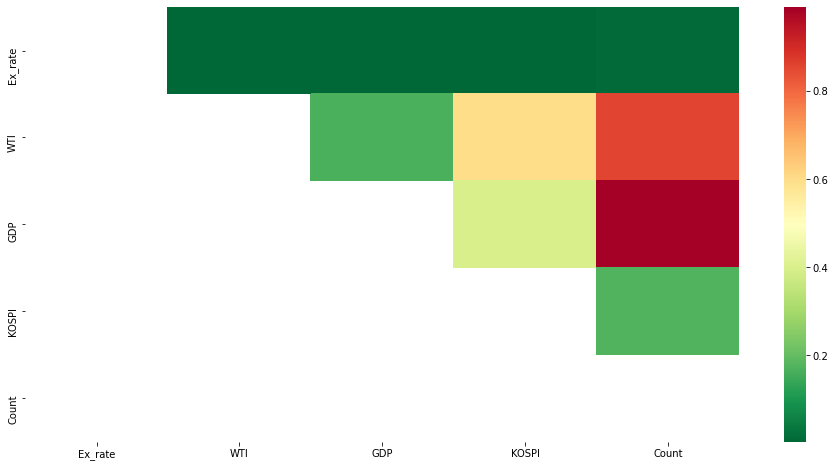

In [ ]:
cols = list(China_Total_data.columns.values)
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=cols,
                yticklabels=cols, cmap='RdYlGn_r',
                mask = (pvalues >= 1))

In [ ]:
pair_pvalue[pair_pvalue['Data2'] == 'Count']

,Data1,Data2,pvalue,p < 0.05,p < 0.02
3,Ex_rate,Count,0.008360,Y,Y
9,KOSPI,Count,0.174598,N,N
6,WTI,Count,0.859095,N,N
8,GDP,Count,0.991343,N,N


### 일본

In [ ]:
scores, pvalues, pair_pvalue, pairs = find_cointegrated_pairs(Japan_Total_data)

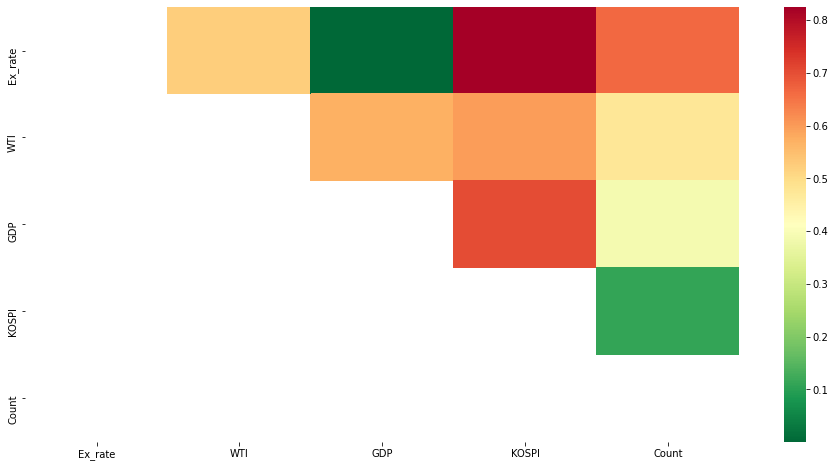

In [ ]:
cols = list(Japan_Total_data.columns.values)
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=cols,
                yticklabels=cols, cmap='RdYlGn_r',
                mask = (pvalues >= 1))

In [ ]:
pair_pvalue[pair_pvalue['Data2'] == 'Count']

,Data1,Data2,pvalue,p < 0.05,p < 0.02
9,KOSPI,Count,0.112925,N,N
8,GDP,Count,0.389034,N,N
6,WTI,Count,0.475349,N,N
3,Ex_rate,Count,0.665316,N,N


### 미국

In [ ]:
scores, pvalues, pair_pvalue, pairs = find_cointegrated_pairs(USA_Total_data)

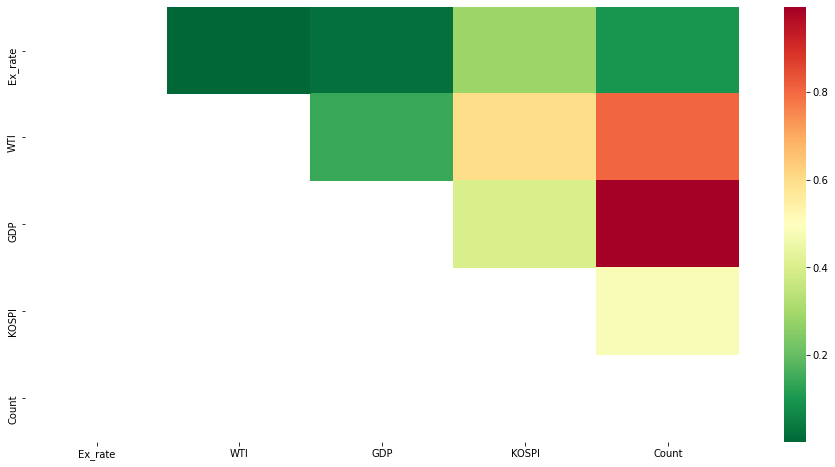

In [ ]:
cols = list(USA_Total_data.columns.values)
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=cols,
                yticklabels=cols, cmap='RdYlGn_r',
                mask = (pvalues >= 1))

In [ ]:
pair_pvalue[pair_pvalue['Data2'] == 'Count']

,Data1,Data2,pvalue,p < 0.05,p < 0.02
3,Ex_rate,Count,0.097344,N,N
9,KOSPI,Count,0.481495,N,N
6,WTI,Count,0.806374,N,N
8,GDP,Count,0.992819,N,N


**국가별 데이터 공적분 검정**

*   중국의 경우에는 **환율(원/위안)이 관광객 수와 장기적으로 유의미한 관계가 있다** (유의수준 2% 이하)
*   일본의 경우에는 대체로 **변수들이 관광객 수와 장기적으로 유의미한 관계를 가지지 않는다.** 그 중에서 제일 유의미하다고 할 수 있는 변수는 KOSPI
*   미국의 경우에도 **환율(원/달러)**을 제외한 변수들이 관광객 수와 장기적으로 유의미한 관계를 가지지 않는다. 



### 국가별 데이터 공적분 검정 결론
*   환율, 유가, GDP, KOSPI등으로 장기적인 관광객 수요 예측은 어려울 수 있다.

## 교차 상관관계 분석

*   단기적으로 해당 시점에서 변수가 얼마나 다른 변수와 상관성이 있는지 파악할 수 있음


In [ ]:
from scipy import signal

### 중국

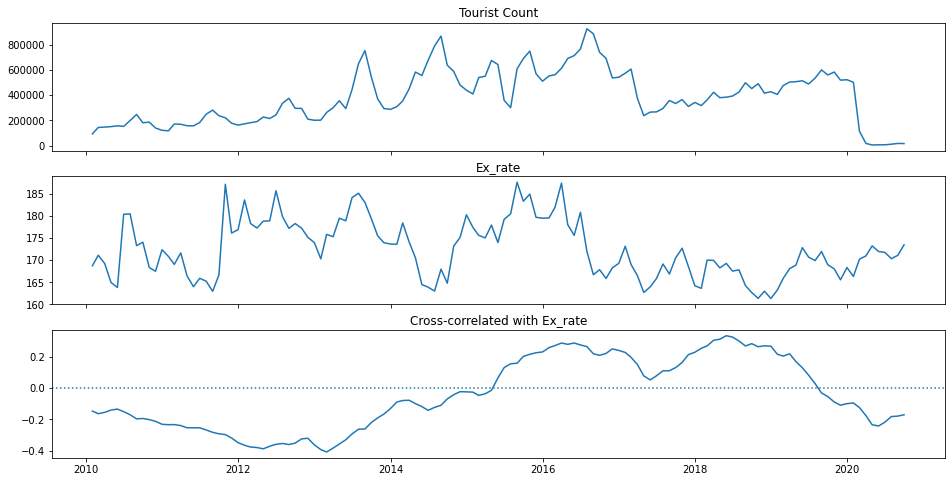

In [ ]:
comp = 'Ex_rate'
Y = China_Total_data['Count']
X = China_Total_data[comp]

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X = (X - np.mean(X)) / (np.std(X) * len(X))
corr = signal.correlate(Nor_Y, Nor_X, mode='same')

fig, (ax_Y, ax_X, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_Y.plot(Monthly, Y)
ax_Y.set_title('Tourist Count')
ax_X.plot(Monthly,X)
ax_X.set_title(comp)
ax_corr.plot(Monthly, corr)
ax_corr.axhline(0, ls=':')
ax_corr.set_title('Cross-correlated with ' + comp)
fig.show()

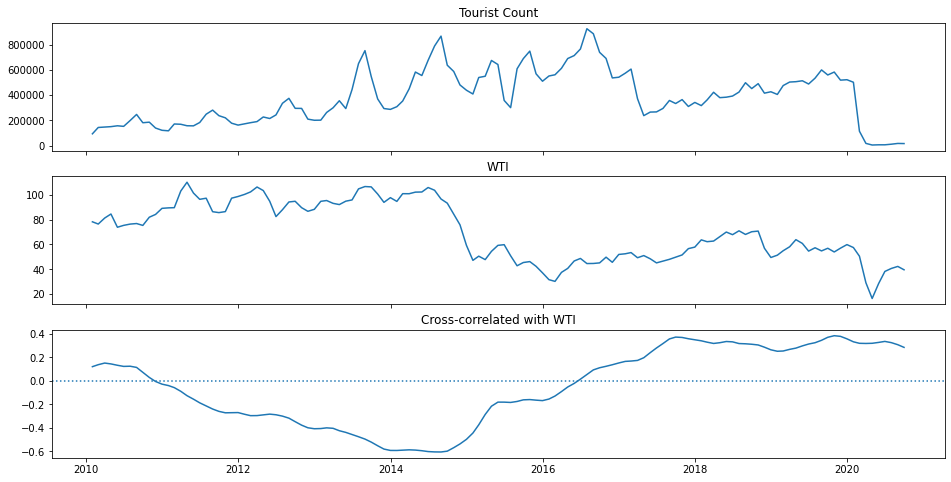

In [ ]:
comp = 'WTI'
Y = China_Total_data['Count']
X = China_Total_data[comp]

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X = (X - np.mean(X)) / (np.std(X) * len(X))
corr = signal.correlate(Nor_Y, Nor_X, mode='same')

fig, (ax_Y, ax_X, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_Y.plot(Monthly, Y)
ax_Y.set_title('Tourist Count')
ax_X.plot(Monthly,X)
ax_X.set_title(comp)
ax_corr.plot(Monthly, corr)
ax_corr.axhline(0, ls=':')
ax_corr.set_title('Cross-correlated with ' + comp)
fig.show()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f47ffee19d8> (for post_execute):


KeyboardInterrupt: ignored

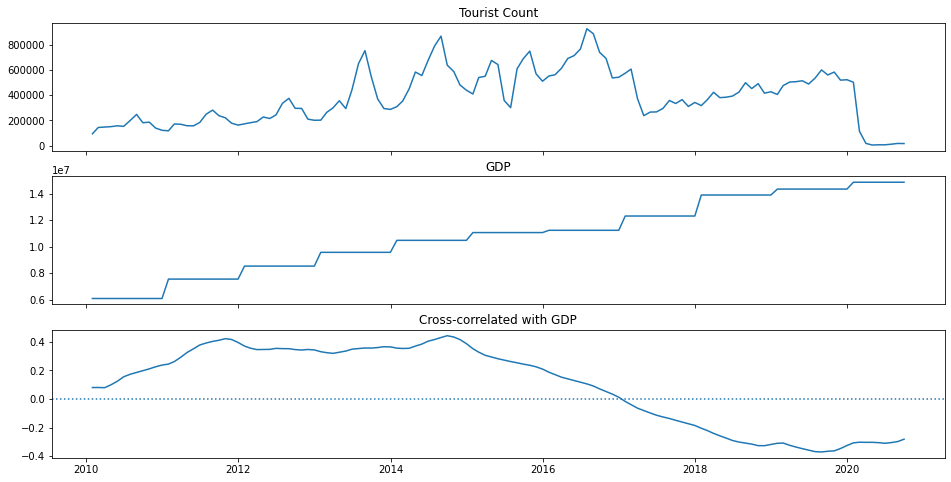

In [ ]:
comp = 'GDP'
Y = China_Total_data['Count']
X = China_Total_data[comp]

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X = (X - np.mean(X)) / (np.std(X) * len(X))
corr = signal.correlate(Nor_Y, Nor_X, mode='same')

fig, (ax_Y, ax_X, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_Y.plot(Monthly, Y)
ax_Y.set_title('Tourist Count')
ax_X.plot(Monthly,X)
ax_X.set_title(comp)
ax_corr.plot(Monthly, corr)
ax_corr.axhline(0, ls=':')
ax_corr.set_title('Cross-correlated with ' + comp)
fig.show()

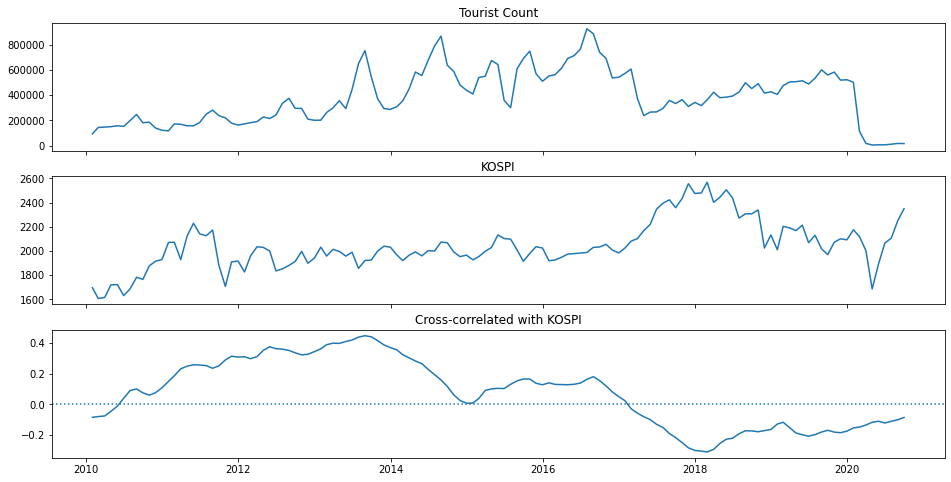

In [ ]:
comp = 'KOSPI'
Y = China_Total_data['Count']
X = China_Total_data[comp]

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X = (X - np.mean(X)) / (np.std(X) * len(X))
corr = signal.correlate(Nor_Y, Nor_X, mode='same')

fig, (ax_Y, ax_X, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_Y.plot(Monthly, Y)
ax_Y.set_title('Tourist Count')
ax_X.plot(Monthly,X)
ax_X.set_title(comp)
ax_corr.plot(Monthly, corr)
ax_corr.axhline(0, ls=':')
ax_corr.set_title('Cross-correlated with ' + comp)
fig.show()

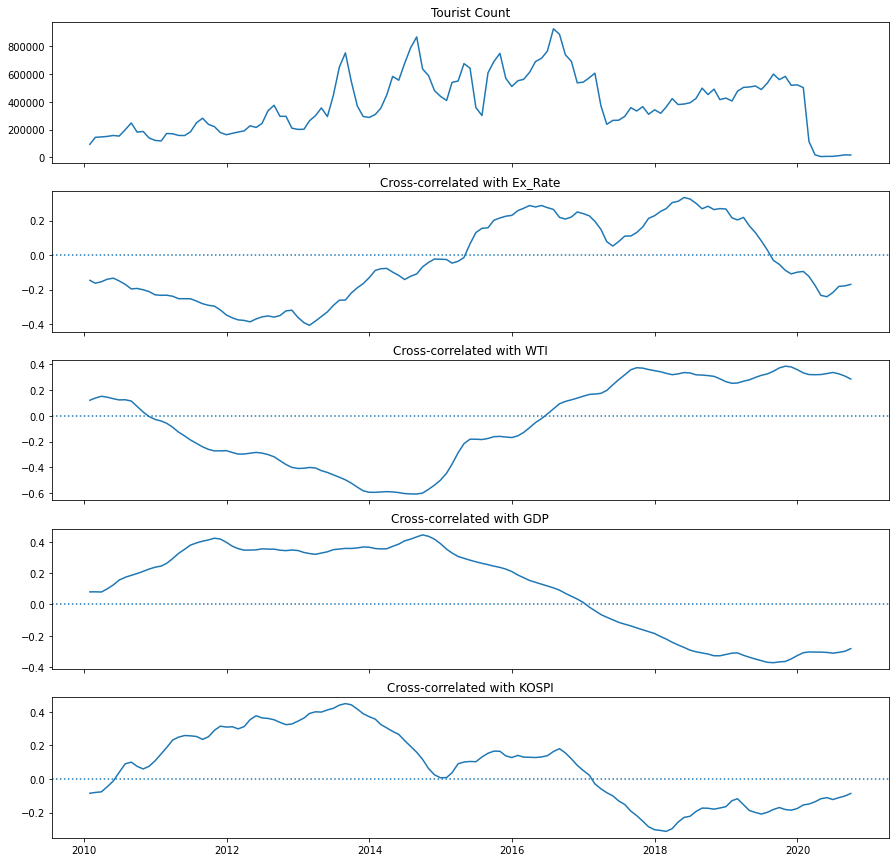

In [ ]:
data = China_Total_data
X_1 = data['Ex_rate']
X_2 = data['WTI']
X_3 = data['GDP']
X_4 = data['KOSPI']
Y = data['Count']

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X_1 = (X_1 - np.mean(X_1)) / (np.std(X_1) * len(X_1))
Nor_X_2 = (X_2 - np.mean(X_2)) / (np.std(X_2) * len(X_2))
Nor_X_3 = (X_3 - np.mean(X_3)) / (np.std(X_3) * len(X_3))
Nor_X_4 = (X_4 - np.mean(X_4)) / (np.std(X_4) * len(X_4))

corr_1 = signal.correlate(Nor_Y, Nor_X_1, mode='same')
corr_2 = signal.correlate(Nor_Y, Nor_X_2, mode='same')
corr_3 = signal.correlate(Nor_Y, Nor_X_3, mode='same')
corr_4 = signal.correlate(Nor_Y, Nor_X_4, mode='same')

fig, (ax_Y, ax_1, ax_2, ax_3, ax_4) = plt.subplots(5, 1,figsize=(15,15), sharex=True)

ax_Y.plot(Monthly, Y)
ax_Y.set_title('Tourist Count')

ax_1.plot(Monthly, corr_1)
ax_1.axhline(0, ls=':')
ax_1.set_title('Cross-correlated with Ex_Rate')

ax_2.plot(Monthly, corr_2)
ax_2.axhline(0, ls=':')
ax_2.set_title('Cross-correlated with WTI')

ax_3.plot(Monthly, corr_3)
ax_3.axhline(0, ls=':')
ax_3.set_title('Cross-correlated with GDP')

ax_4.plot(Monthly, corr_4)
ax_4.axhline(0, ls=':')
ax_4.set_title('Cross-correlated with KOSPI')

fig.show()

### 일본

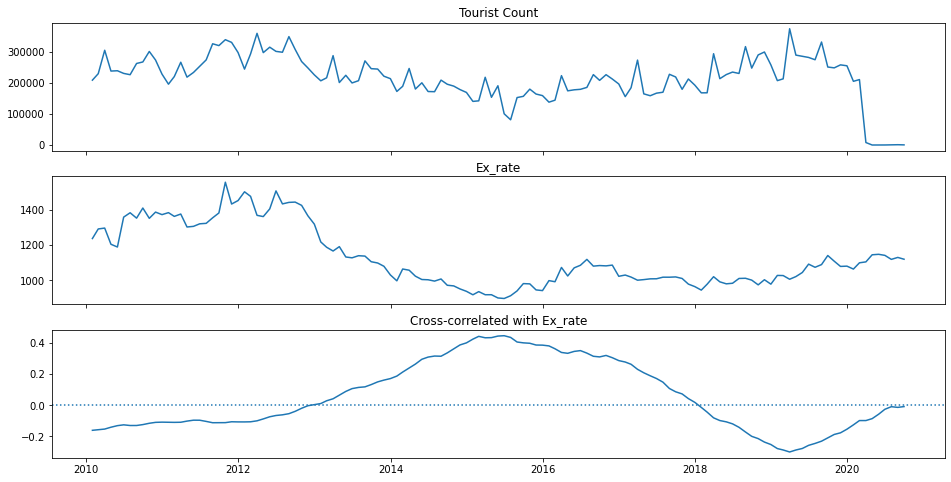

In [ ]:
comp = 'Ex_rate'
Y = Japan_Total_data['Count']
X = Japan_Total_data[comp]

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X = (X - np.mean(X)) / (np.std(X) * len(X))
corr = signal.correlate(Nor_Y, Nor_X, mode='same')

fig, (ax_Y, ax_X, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_Y.plot(Monthly, Y)
ax_Y.set_title('Tourist Count')
ax_X.plot(Monthly,X)
ax_X.set_title(comp)
ax_corr.plot(Monthly, corr)
ax_corr.axhline(0, ls=':')
ax_corr.set_title('Cross-correlated with ' + comp)
fig.show()

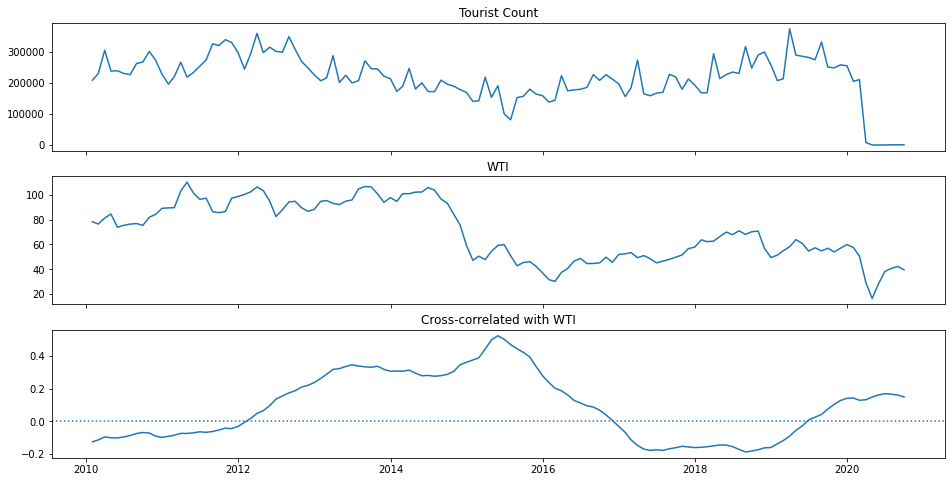

In [ ]:
comp = 'WTI'
Y = Japan_Total_data['Count']
X = Japan_Total_data[comp]

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X = (X - np.mean(X)) / (np.std(X) * len(X))
corr = signal.correlate(Nor_Y, Nor_X, mode='same')

fig, (ax_Y, ax_X, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_Y.plot(Monthly, Y)
ax_Y.set_title('Tourist Count')
ax_X.plot(Monthly,X)
ax_X.set_title(comp)
ax_corr.plot(Monthly, corr)
ax_corr.axhline(0, ls=':')
ax_corr.set_title('Cross-correlated with ' + comp)
fig.show()

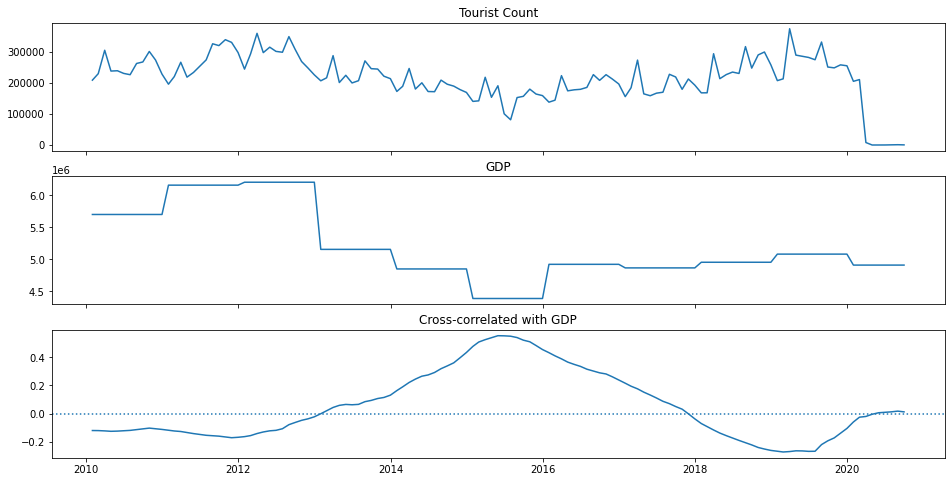

In [ ]:
comp = 'GDP'
Y = Japan_Total_data['Count']
X = Japan_Total_data[comp]

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X = (X - np.mean(X)) / (np.std(X) * len(X))
corr = signal.correlate(Nor_Y, Nor_X, mode='same')

fig, (ax_Y, ax_X, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_Y.plot(Monthly, Y)
ax_Y.set_title('Tourist Count')
ax_X.plot(Monthly,X)
ax_X.set_title(comp)
ax_corr.plot(Monthly, corr)
ax_corr.axhline(0, ls=':')
ax_corr.set_title('Cross-correlated with ' + comp)
fig.show()

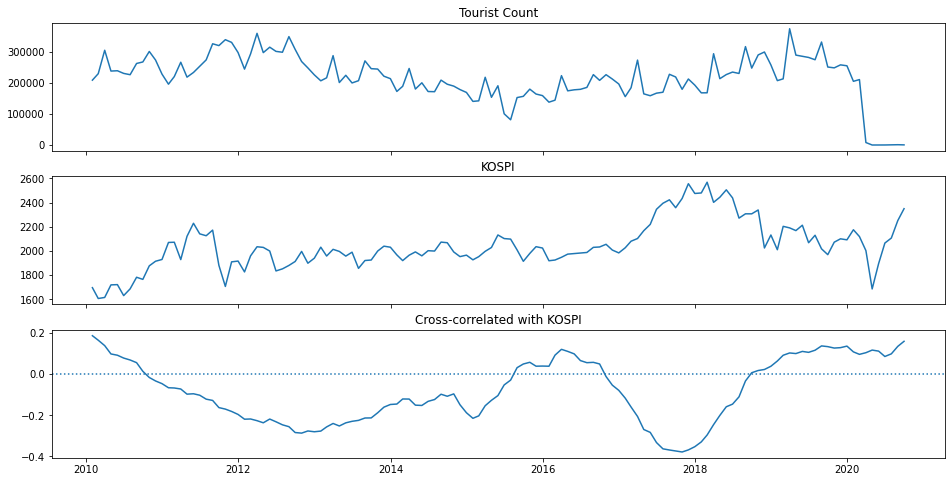

In [ ]:
comp = 'KOSPI'
Y = Japan_Total_data['Count']
X = Japan_Total_data[comp]

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X = (X - np.mean(X)) / (np.std(X) * len(X))
corr = signal.correlate(Nor_Y, Nor_X, mode='same')

fig, (ax_Y, ax_X, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_Y.plot(Monthly, Y)
ax_Y.set_title('Tourist Count')
ax_X.plot(Monthly,X)
ax_X.set_title(comp)
ax_corr.plot(Monthly, corr)
ax_corr.axhline(0, ls=':')
ax_corr.set_title('Cross-correlated with ' + comp)
fig.show()

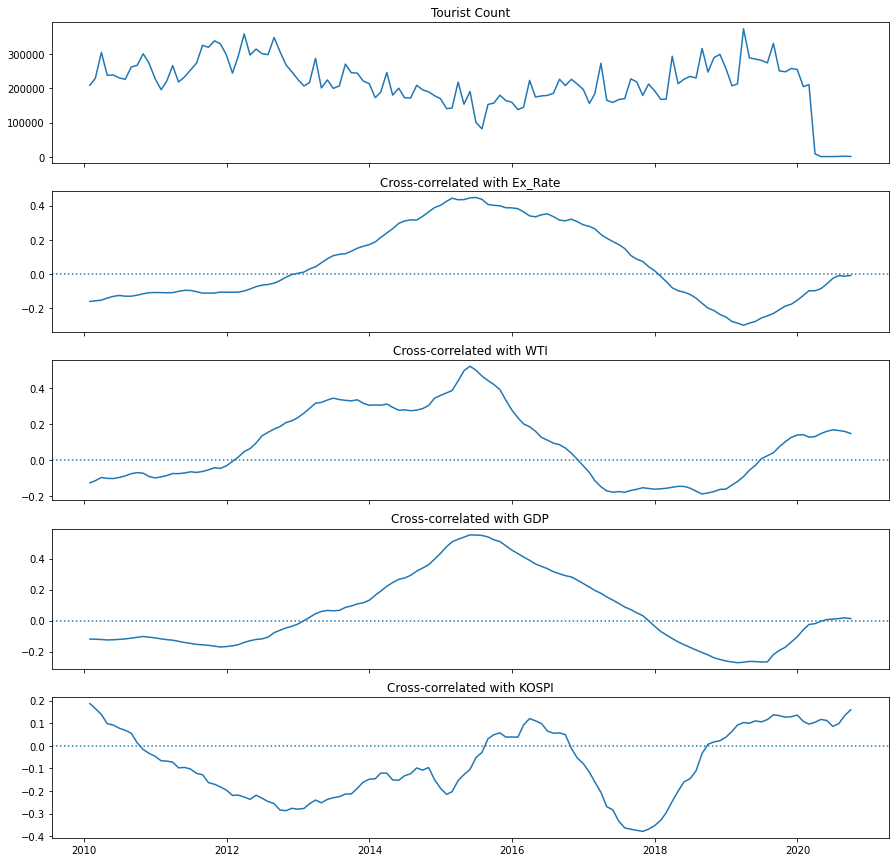

In [ ]:
data = Japan_Total_data
X_1 = data['Ex_rate']
X_2 = data['WTI']
X_3 = data['GDP']
X_4 = data['KOSPI']
Y = data['Count']

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X_1 = (X_1 - np.mean(X_1)) / (np.std(X_1) * len(X_1))
Nor_X_2 = (X_2 - np.mean(X_2)) / (np.std(X_2) * len(X_2))
Nor_X_3 = (X_3 - np.mean(X_3)) / (np.std(X_3) * len(X_3))
Nor_X_4 = (X_4 - np.mean(X_4)) / (np.std(X_4) * len(X_4))

corr_1 = signal.correlate(Nor_Y, Nor_X_1, mode='same')
corr_2 = signal.correlate(Nor_Y, Nor_X_2, mode='same')
corr_3 = signal.correlate(Nor_Y, Nor_X_3, mode='same')
corr_4 = signal.correlate(Nor_Y, Nor_X_4, mode='same')

fig, (ax_Y, ax_1, ax_2, ax_3, ax_4) = plt.subplots(5, 1,figsize=(15,15), sharex=True)

ax_Y.plot(Monthly, Y)
ax_Y.set_title('Tourist Count')

ax_1.plot(Monthly, corr_1)
ax_1.axhline(0, ls=':')
ax_1.set_title('Cross-correlated with Ex_Rate')

ax_2.plot(Monthly, corr_2)
ax_2.axhline(0, ls=':')
ax_2.set_title('Cross-correlated with WTI')

ax_3.plot(Monthly, corr_3)
ax_3.axhline(0, ls=':')
ax_3.set_title('Cross-correlated with GDP')

ax_4.plot(Monthly, corr_4)
ax_4.axhline(0, ls=':')
ax_4.set_title('Cross-correlated with KOSPI')

fig.show()

### 미국

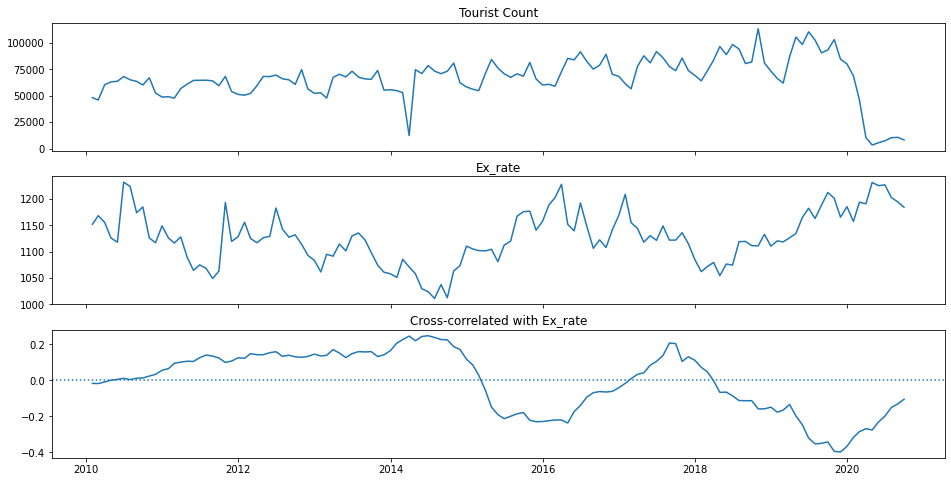

In [ ]:
comp = 'Ex_rate'
Y = USA_Total_data['Count']
X = USA_Total_data[comp]

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X = (X - np.mean(X)) / (np.std(X) * len(X))
corr = signal.correlate(Nor_Y, Nor_X, mode='same')

fig, (ax_Y, ax_X, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_Y.plot(Monthly, Y)
ax_Y.set_title('Tourist Count')
ax_X.plot(Monthly,X)
ax_X.set_title(comp)
ax_corr.plot(Monthly, corr)
ax_corr.axhline(0, ls=':')
ax_corr.set_title('Cross-correlated with ' + comp)
fig.show()

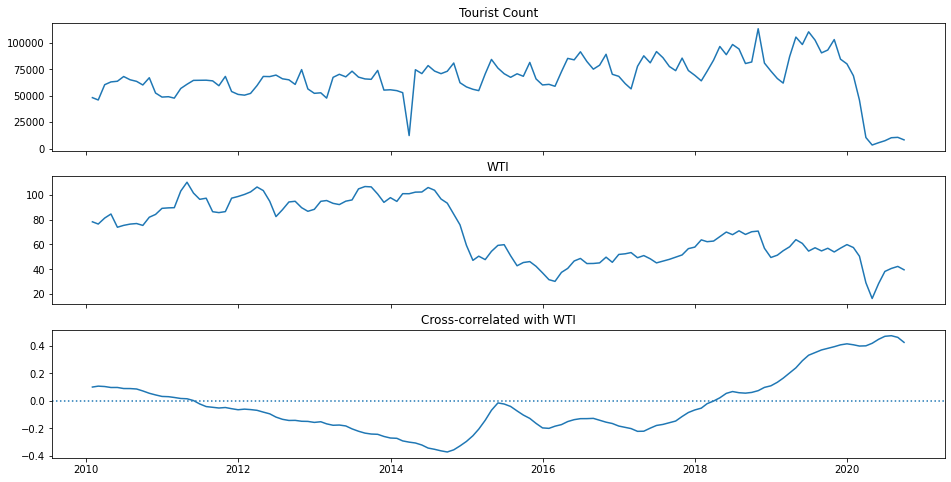

In [ ]:
comp = 'WTI'
Y = USA_Total_data['Count']
X = USA_Total_data[comp]

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X = (X - np.mean(X)) / (np.std(X) * len(X))
corr = signal.correlate(Nor_Y, Nor_X, mode='same')

fig, (ax_Y, ax_X, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_Y.plot(Monthly, Y)
ax_Y.set_title('Tourist Count')
ax_X.plot(Monthly,X)
ax_X.set_title(comp)
ax_corr.plot(Monthly, corr)
ax_corr.axhline(0, ls=':')
ax_corr.set_title('Cross-correlated with ' + comp)
fig.show()

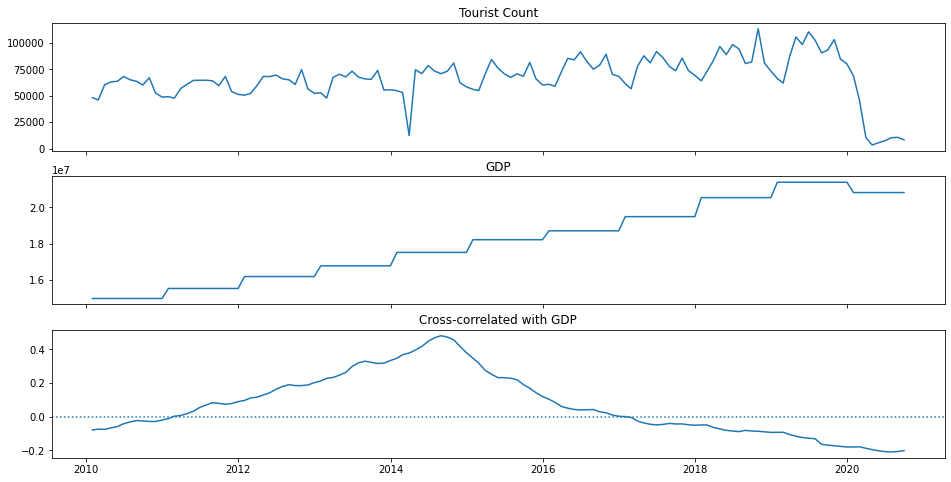

In [ ]:
comp = 'GDP'
Y = USA_Total_data['Count']
X = USA_Total_data[comp]

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X = (X - np.mean(X)) / (np.std(X) * len(X))
corr = signal.correlate(Nor_Y, Nor_X, mode='same')

fig, (ax_Y, ax_X, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_Y.plot(Monthly, Y)
ax_Y.set_title('Tourist Count')
ax_X.plot(Monthly,X)
ax_X.set_title(comp)
ax_corr.plot(Monthly, corr)
ax_corr.axhline(0, ls=':')
ax_corr.set_title('Cross-correlated with ' + comp)
fig.show()

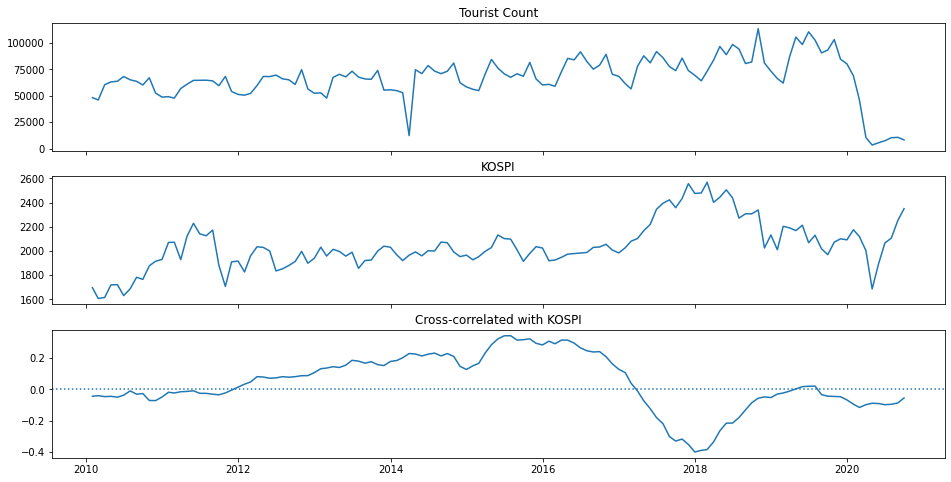

In [ ]:
comp = 'KOSPI'
Y = USA_Total_data['Count']
X = USA_Total_data[comp]

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X = (X - np.mean(X)) / (np.std(X) * len(X))
corr = signal.correlate(Nor_Y, Nor_X, mode='same')

fig, (ax_Y, ax_X, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_Y.plot(Monthly, Y)
ax_Y.set_title('Tourist Count')
ax_X.plot(Monthly,X)
ax_X.set_title(comp)
ax_corr.plot(Monthly, corr)
ax_corr.axhline(0, ls=':')
ax_corr.set_title('Cross-correlated with ' + comp)
fig.show()

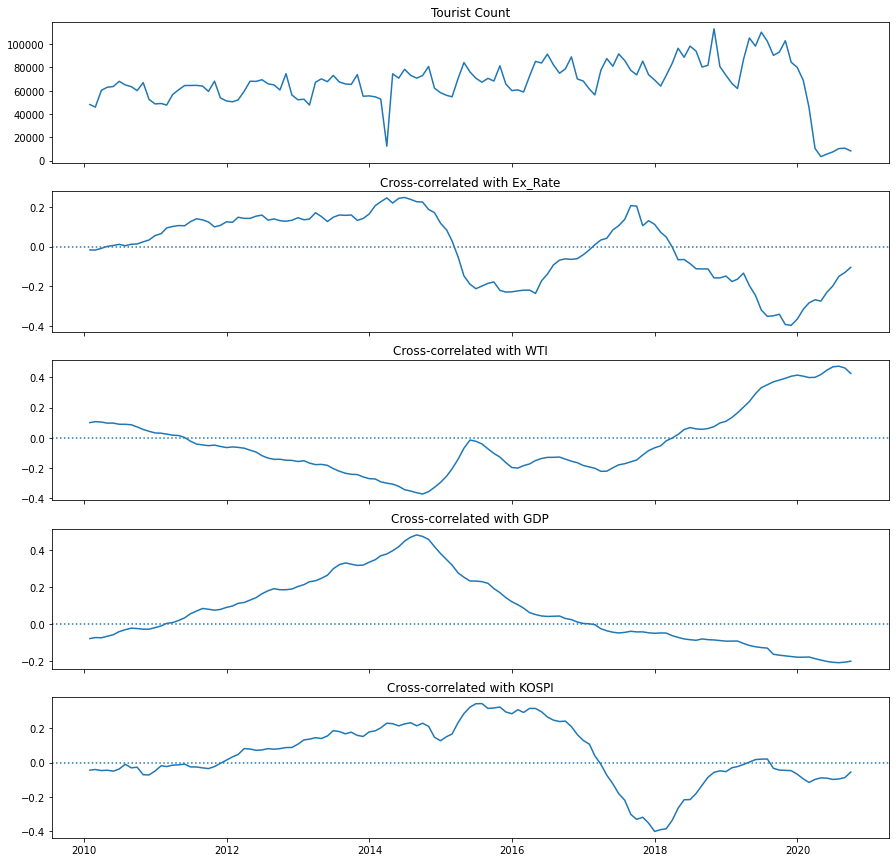

In [ ]:
data = USA_Total_data
X_1 = data['Ex_rate']
X_2 = data['WTI']
X_3 = data['GDP']
X_4 = data['KOSPI']
Y = data['Count']

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X_1 = (X_1 - np.mean(X_1)) / (np.std(X_1) * len(X_1))
Nor_X_2 = (X_2 - np.mean(X_2)) / (np.std(X_2) * len(X_2))
Nor_X_3 = (X_3 - np.mean(X_3)) / (np.std(X_3) * len(X_3))
Nor_X_4 = (X_4 - np.mean(X_4)) / (np.std(X_4) * len(X_4))

corr_1 = signal.correlate(Nor_Y, Nor_X_1, mode='same')
corr_2 = signal.correlate(Nor_Y, Nor_X_2, mode='same')
corr_3 = signal.correlate(Nor_Y, Nor_X_3, mode='same')
corr_4 = signal.correlate(Nor_Y, Nor_X_4, mode='same')

fig, (ax_Y, ax_1, ax_2, ax_3, ax_4) = plt.subplots(5, 1,figsize=(15,15), sharex=True)

ax_Y.plot(Monthly, Y)
ax_Y.set_title('Tourist Count')

ax_1.plot(Monthly, corr_1)
ax_1.axhline(0, ls=':')
ax_1.set_title('Cross-correlated with Ex_Rate')

ax_2.plot(Monthly, corr_2)
ax_2.axhline(0, ls=':')
ax_2.set_title('Cross-correlated with WTI')

ax_3.plot(Monthly, corr_3)
ax_3.axhline(0, ls=':')
ax_3.set_title('Cross-correlated with GDP')

ax_4.plot(Monthly, corr_4)
ax_4.axhline(0, ls=':')
ax_4.set_title('Cross-correlated with KOSPI')

fig.show()


# 지역별 경제적 독립변수들에 대한 상관성 분석

*   각 지역별로 경제 요인이 얼마나 영향을 미치는지 확인



## 데이터 합치기

### 서울, 수원, 인천, 제주, 부산

*   관광객 수, 유가, 코스피



In [ ]:
Seoul_Total_data = pd.DataFrame(index=City_Monthly, columns=['WTI', 'KOSPI', 'Count'])
Suwon_Total_data = pd.DataFrame(index=City_Monthly, columns=['WTI', 'KOSPI', 'Count'])
Incheon_Total_data = pd.DataFrame(index=City_Monthly, columns=['WTI', 'KOSPI', 'Count'])
Jeju_Total_data = pd.DataFrame(index=City_Monthly, columns=['WTI', 'KOSPI', 'Count'])
Busan_Total_data = pd.DataFrame(index=City_Monthly, columns=['WTI', 'KOSPI', 'Count'])

In [ ]:
Seoul_Total_data['WTI'] = Oil_price['WTISPLC'].astype(float)
Seoul_Total_data['KOSPI'] = KOSPI['현재지수'].astype(float)
Seoul_Total_data['Count'] = Seoul_Time_Series['Count'].astype(float)

Suwon_Total_data['WTI'] = Oil_price['WTISPLC'].astype(float)
Suwon_Total_data['KOSPI'] = KOSPI['현재지수'].astype(float)
Suwon_Total_data['Count'] = Suwon_Time_Series['Count'].astype(float)

Incheon_Total_data['WTI'] = Oil_price['WTISPLC'].astype(float)
Incheon_Total_data['KOSPI'] = KOSPI['현재지수'].astype(float)
Incheon_Total_data['Count'] = Incheon_Time_Series['Count'].astype(float)

Jeju_Total_data['WTI'] = Oil_price['WTISPLC'].astype(float)
Jeju_Total_data['KOSPI'] = KOSPI['현재지수'].astype(float)
Jeju_Total_data['Count'] = Jeju_Time_Series['Count'].astype(float)

Busan_Total_data['WTI'] = Oil_price['WTISPLC'].astype(float)
Busan_Total_data['KOSPI'] = KOSPI['현재지수'].astype(float)
Busan_Total_data['Count'] = Busan_Time_Series['Count'].astype(float)

유가와 코스피는 2020년 10월자 데이터가 없음.

그래서 2020년 10월자 지역별 방문자 수 데이터 뺌.

In [ ]:
Seoul_Total_data = Seoul_Total_data.drop(Seoul_Total_data.index[-1])
Suwon_Total_data = Suwon_Total_data.drop(Suwon_Total_data.index[-1])
Incheon_Total_data = Incheon_Total_data.drop(Incheon_Total_data.index[-1])
Jeju_Total_data = Jeju_Total_data.drop(Jeju_Total_data.index[-1])
Busan_Total_data = Busan_Total_data.drop(Busan_Total_data.index[-1])

## 공적분 분석

### 서울

In [ ]:
scores, pvalues, pair_pvalue, pairs = find_cointegrated_pairs(Seoul_Total_data)

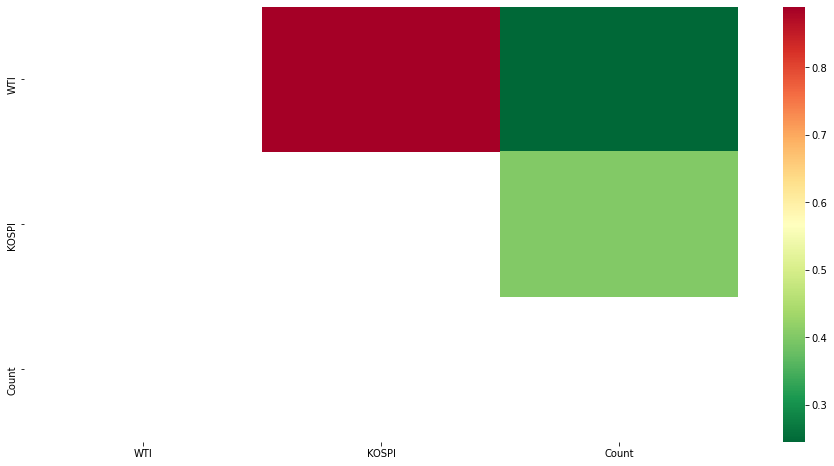

In [ ]:
cols = list(Seoul_Total_data.columns.values)
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=cols,
                yticklabels=cols, cmap='RdYlGn_r',
                mask = (pvalues >= 1))

In [ ]:
pair_pvalue[pair_pvalue['Data2'] == 'Count']

,Data1,Data2,pvalue,p < 0.05,p < 0.02
1,WTI,Count,0.245362,N,N
2,KOSPI,Count,0.402032,N,N


### 수원

In [ ]:
scores, pvalues, pair_pvalue, pairs = find_cointegrated_pairs(Suwon_Total_data)

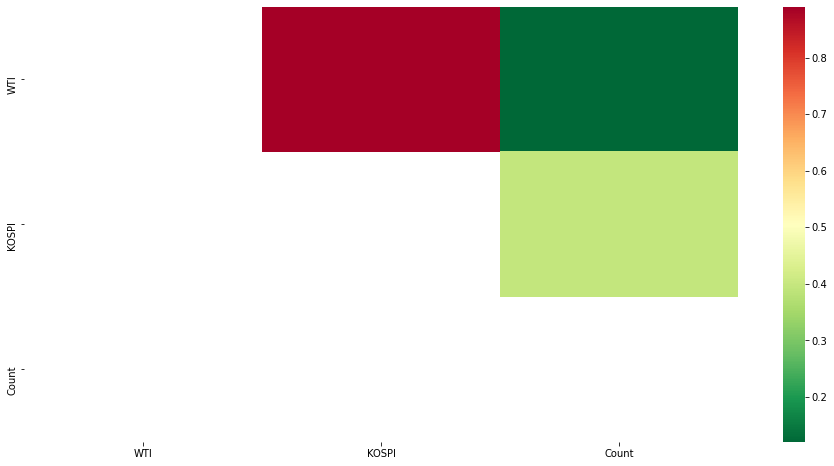

In [ ]:
cols = list(Suwon_Total_data.columns.values)
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=cols,
                yticklabels=cols, cmap='RdYlGn_r',
                mask = (pvalues >= 1))

In [ ]:
pair_pvalue[pair_pvalue['Data2'] == 'Count']

,Data1,Data2,pvalue,p < 0.05,p < 0.02
1,WTI,Count,0.120507,N,N
2,KOSPI,Count,0.396720,N,N


### 인천

In [ ]:
scores, pvalues, pair_pvalue, pairs = find_cointegrated_pairs(Incheon_Total_data)

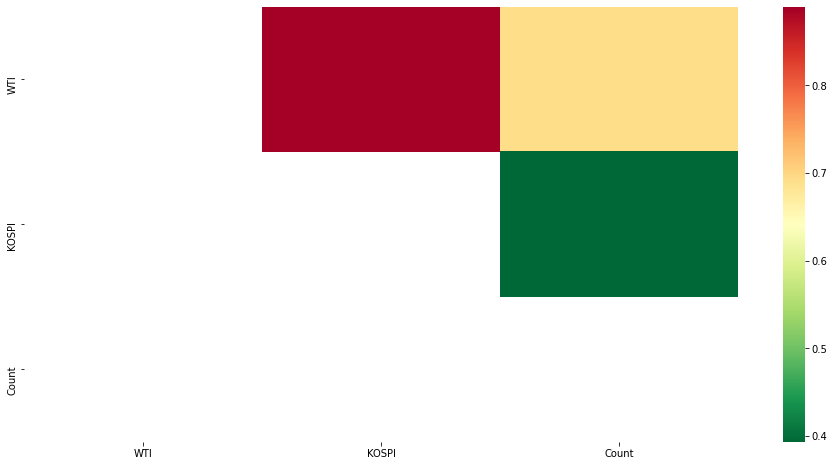

In [ ]:
cols = list(Incheon_Total_data.columns.values)
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=cols,
                yticklabels=cols, cmap='RdYlGn_r',
                mask = (pvalues >= 1))

In [ ]:
pair_pvalue[pair_pvalue['Data2'] == 'Count']

,Data1,Data2,pvalue,p < 0.05,p < 0.02
2,KOSPI,Count,0.393277,N,N
1,WTI,Count,0.693565,N,N


### 제주

In [ ]:
scores, pvalues, pair_pvalue, pairs = find_cointegrated_pairs(Jeju_Total_data)

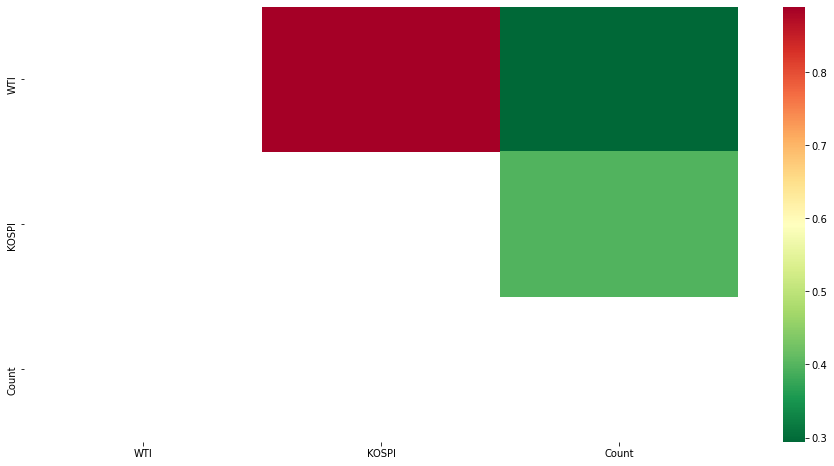

In [ ]:
cols = list(Jeju_Total_data.columns.values)
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=cols,
                yticklabels=cols, cmap='RdYlGn_r',
                mask = (pvalues >= 1))

In [ ]:
pair_pvalue[pair_pvalue['Data2'] == 'Count']

,Data1,Data2,pvalue,p < 0.05,p < 0.02
1,WTI,Count,0.294163,N,N
2,KOSPI,Count,0.397906,N,N


### 부산

In [ ]:
scores, pvalues, pair_pvalue, pairs = find_cointegrated_pairs(Busan_Total_data)

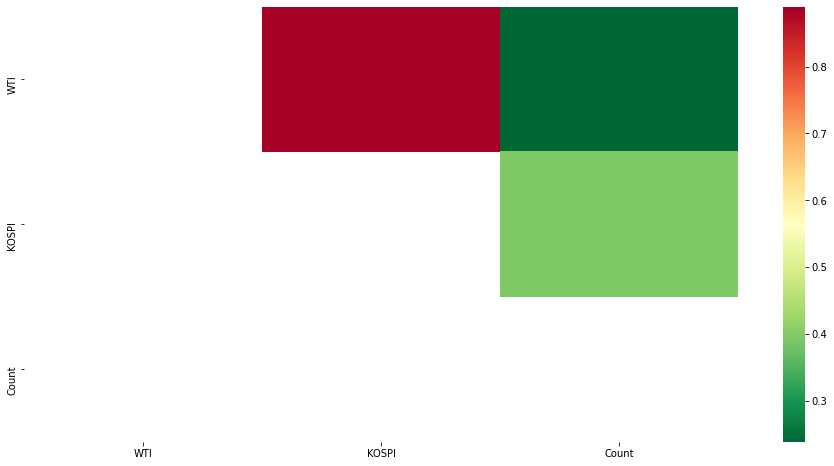

In [ ]:
cols = list(Busan_Total_data.columns.values)
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=cols,
                yticklabels=cols, cmap='RdYlGn_r',
                mask = (pvalues >= 1))

In [ ]:
pair_pvalue[pair_pvalue['Data2'] == 'Count']

,Data1,Data2,pvalue,p < 0.05,p < 0.02
1,WTI,Count,0.238510,N,N
2,KOSPI,Count,0.394485,N,N


## 교차 상관관계 분석

### 서울

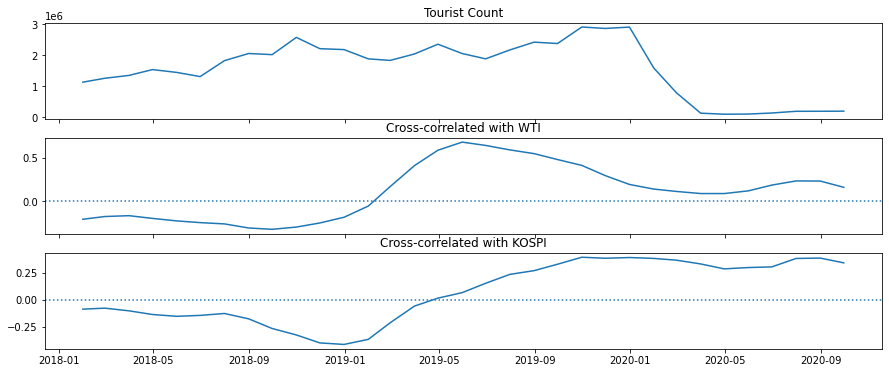

In [ ]:
data = Seoul_Total_data
X_2 = data['WTI']
X_4 = data['KOSPI']
Y = data['Count']

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X_2 = (X_2 - np.mean(X_2)) / (np.std(X_2) * len(X_2))
Nor_X_4 = (X_4 - np.mean(X_4)) / (np.std(X_4) * len(X_4))

corr_2 = signal.correlate(Nor_Y, Nor_X_2, mode='same')
corr_4 = signal.correlate(Nor_Y, Nor_X_4, mode='same')

fig, (ax_Y, ax_2, ax_4) = plt.subplots(3, 1,figsize=(15,6), sharex=True)

ax_Y.plot(City_Monthly[:-1], Y)
ax_Y.set_title('Tourist Count')

ax_2.plot(City_Monthly[:-1], corr_2)
ax_2.axhline(0, ls=':')
ax_2.set_title('Cross-correlated with WTI')

ax_4.plot(City_Monthly[:-1], corr_4)
ax_4.axhline(0, ls=':')
ax_4.set_title('Cross-correlated with KOSPI')

fig.show()

### 수원

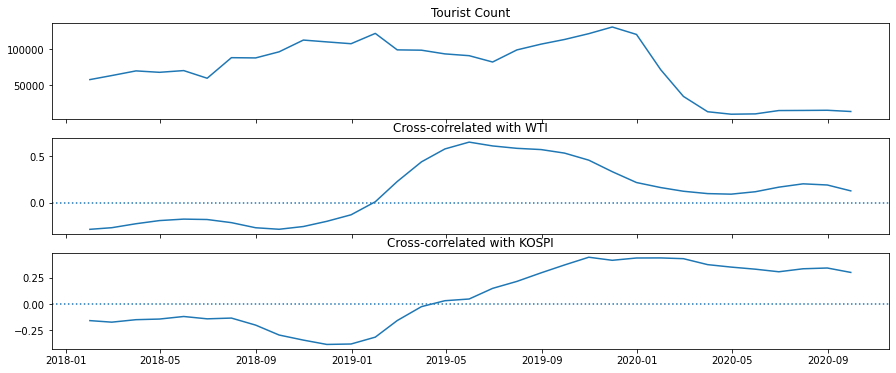

In [ ]:
data = Suwon_Total_data
X_2 = data['WTI']
X_4 = data['KOSPI']
Y = data['Count']

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X_2 = (X_2 - np.mean(X_2)) / (np.std(X_2) * len(X_2))
Nor_X_4 = (X_4 - np.mean(X_4)) / (np.std(X_4) * len(X_4))

corr_2 = signal.correlate(Nor_Y, Nor_X_2, mode='same')
corr_4 = signal.correlate(Nor_Y, Nor_X_4, mode='same')

fig, (ax_Y, ax_2, ax_4) = plt.subplots(3, 1,figsize=(15,6), sharex=True)

ax_Y.plot(City_Monthly[:-1], Y)
ax_Y.set_title('Tourist Count')

ax_2.plot(City_Monthly[:-1], corr_2)
ax_2.axhline(0, ls=':')
ax_2.set_title('Cross-correlated with WTI')

ax_4.plot(City_Monthly[:-1], corr_4)
ax_4.axhline(0, ls=':')
ax_4.set_title('Cross-correlated with KOSPI')

fig.show()

### 인천

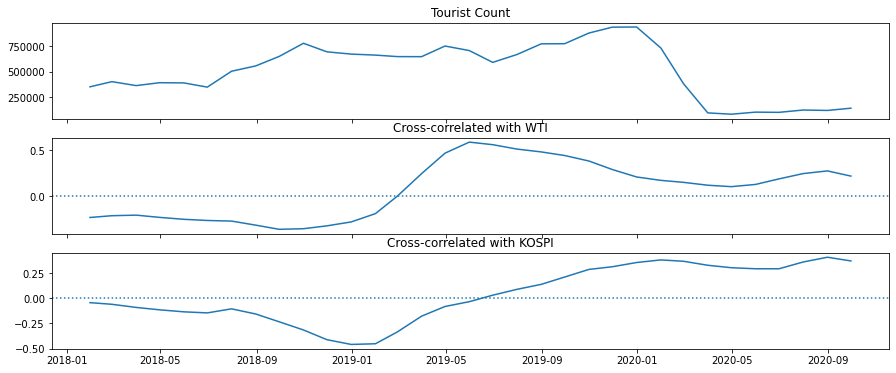

In [ ]:
data = Incheon_Total_data
X_2 = data['WTI']
X_4 = data['KOSPI']
Y = data['Count']

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X_2 = (X_2 - np.mean(X_2)) / (np.std(X_2) * len(X_2))
Nor_X_4 = (X_4 - np.mean(X_4)) / (np.std(X_4) * len(X_4))

corr_2 = signal.correlate(Nor_Y, Nor_X_2, mode='same')
corr_4 = signal.correlate(Nor_Y, Nor_X_4, mode='same')

fig, (ax_Y, ax_2, ax_4) = plt.subplots(3, 1,figsize=(15,6), sharex=True)

ax_Y.plot(City_Monthly[:-1], Y)
ax_Y.set_title('Tourist Count')

ax_2.plot(City_Monthly[:-1], corr_2)
ax_2.axhline(0, ls=':')
ax_2.set_title('Cross-correlated with WTI')

ax_4.plot(City_Monthly[:-1], corr_4)
ax_4.axhline(0, ls=':')
ax_4.set_title('Cross-correlated with KOSPI')

fig.show()

### 제주

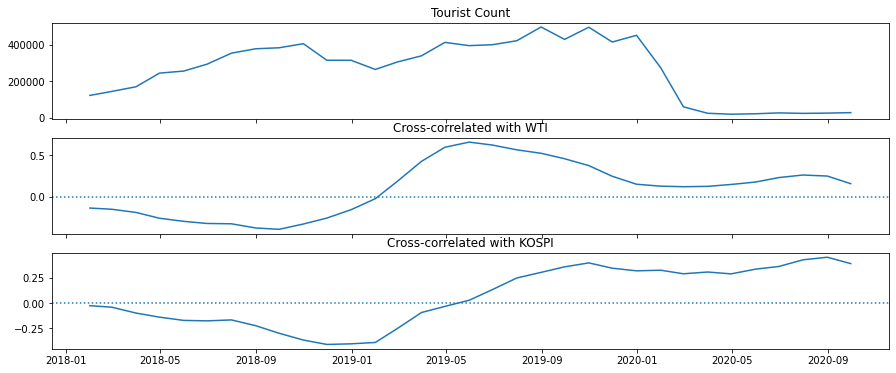

In [ ]:
data = Jeju_Total_data
X_2 = data['WTI']
X_4 = data['KOSPI']
Y = data['Count']

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X_2 = (X_2 - np.mean(X_2)) / (np.std(X_2) * len(X_2))
Nor_X_4 = (X_4 - np.mean(X_4)) / (np.std(X_4) * len(X_4))

corr_2 = signal.correlate(Nor_Y, Nor_X_2, mode='same')
corr_4 = signal.correlate(Nor_Y, Nor_X_4, mode='same')

fig, (ax_Y, ax_2, ax_4) = plt.subplots(3, 1,figsize=(15,6), sharex=True)

ax_Y.plot(City_Monthly[:-1], Y)
ax_Y.set_title('Tourist Count')

ax_2.plot(City_Monthly[:-1], corr_2)
ax_2.axhline(0, ls=':')
ax_2.set_title('Cross-correlated with WTI')

ax_4.plot(City_Monthly[:-1], corr_4)
ax_4.axhline(0, ls=':')
ax_4.set_title('Cross-correlated with KOSPI')

fig.show()

### 부산

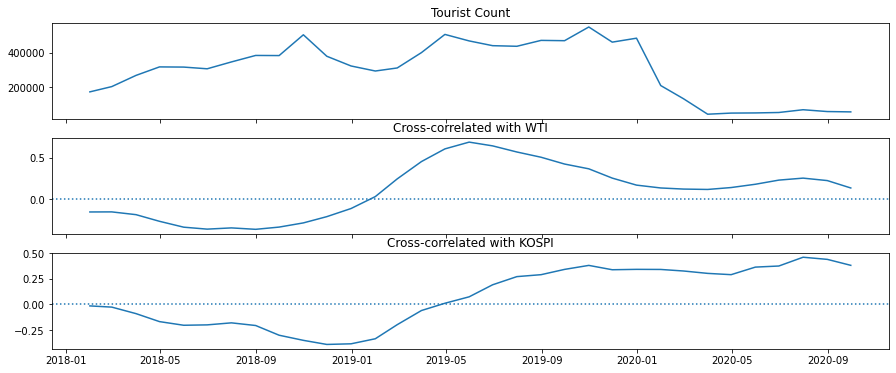

In [ ]:
data = Busan_Total_data
X_2 = data['WTI']
X_4 = data['KOSPI']
Y = data['Count']

Nor_Y = (Y - np.mean(Y)) / np.std(Y)
Nor_X_2 = (X_2 - np.mean(X_2)) / (np.std(X_2) * len(X_2))
Nor_X_4 = (X_4 - np.mean(X_4)) / (np.std(X_4) * len(X_4))

corr_2 = signal.correlate(Nor_Y, Nor_X_2, mode='same')
corr_4 = signal.correlate(Nor_Y, Nor_X_4, mode='same')

fig, (ax_Y, ax_2, ax_4) = plt.subplots(3, 1,figsize=(15,6), sharex=True)

ax_Y.plot(City_Monthly[:-1], Y)
ax_Y.set_title('Tourist Count')

ax_2.plot(City_Monthly[:-1], corr_2)
ax_2.axhline(0, ls=':')
ax_2.set_title('Cross-correlated with WTI')

ax_4.plot(City_Monthly[:-1], corr_4)
ax_4.axhline(0, ls=':')
ax_4.set_title('Cross-correlated with KOSPI')

fig.show()

# 더미변수들의 상관성 분석



## 코로나


*   코로나 전 기간과 코로나 후 기간으로 나눔 (코로나 시작은 2020년 1월부터라고 생각함)
*   코로나 전 기간의 데이터를 토대로 코로나가 안 일어났을 때를 가정함
*   국가별 및 지역별



In [ ]:
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from itertools import product
from tqdm import tqdm_notebook

In [ ]:
China_TS_PreC = China_Time_Series[:-9]
Japan_TS_PreC = Japan_Time_Series[:-9]
USA_TS_PreC = USA_Time_Series[:-9]
Total_Country_TS_PreC = Total_Country_Time_Series[:-9]

China_TS_C = China_Time_Series[-9:]
Japan_TS_C = Japan_Time_Series[-9:]
USA_TS_C = USA_Time_Series[-9:]
Total_Country_TS_C = Total_Country_Time_Series[-9:]

In [ ]:
China_PreC_STL = seasonal_decompose(China_TS_PreC['Count'], model='additive')
Japan_PreC_STL = seasonal_decompose(Japan_TS_PreC['Count'], model='additive')
USA_PreC_STL = seasonal_decompose(USA_TS_PreC['Count'], model='additive')
Total_Country_PreC_STL = seasonal_decompose(Total_Country_TS_PreC['Count'], model='additive')

### 중국

**단위근 검정**


*   관광객 수 변화를 안정적이게 하여 좀 더 정확한 2020년 데이터 예측을 하게끔 함



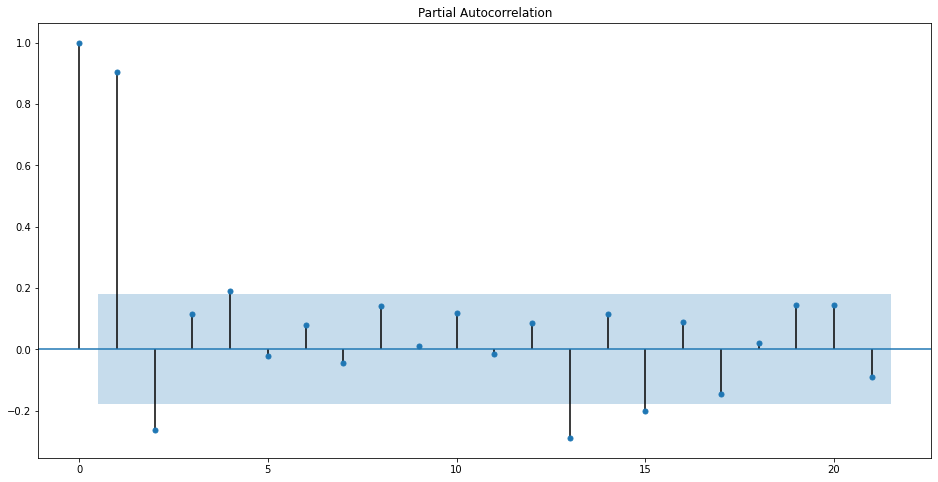

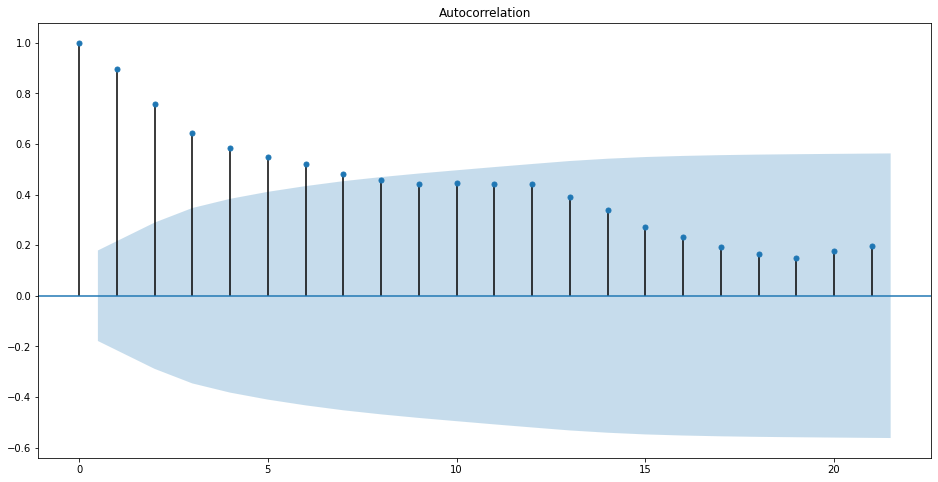

In [ ]:
plot_pacf(China_TS_PreC['Count'])
plot_acf(China_TS_PreC['Count'])
plt.show()

In [ ]:
ad_fuller_result = adfuller(China_TS_PreC['Count'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.26232641405622
p-value: 0.18440638159259293


p-value가 조금 커서 관광객 수 변화 그래프가 안정적이다 할 수 없음

따라서 데이터에 변화를 주어 안정적이게끔 함
(로그를 취하고 미분)

In [ ]:
pros_data = China_TS_PreC.copy()
pros_data['Log'] = np.log(pros_data['Count'])
pros_data['Log_diff'] = pros_data['Log'].diff()
pros_data = pros_data.drop(pros_data.index[0])

In [ ]:
ad_fuller_result = adfuller(pros_data['Log_diff'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.1222298038948395
p-value: 0.024951227139520017


p-value값이 유의수준 2.5% 정도이므로 충분히 안정적이다 라고 할 수 있음

SARIMA(Seasonality를 반영한 ARIMA 모델) 만들기

In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

SARIMA에 들어갈 parameter들 조합 만들기

(SARIMA 모형 : ARIMA(p, d, q) x (P, D, Q))

In [ ]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [ ]:
result_df = optimize_SARIMA(parameters_list, 1, 1, 4, pros_data['Log_diff'])
result_df

In [ ]:
best_model = SARIMAX(pros_data['Log_diff'], order=(0, 1, 2), seasonal_order=(0, 1, 2, 4)).fit(dis=-1)
print(best_model.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                 Statespace Model Results                                
Dep. Variable:                          Log_diff   No. Observations:                  119
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 4)   Log Likelihood                  26.521
Date:                           Thu, 03 Dec 2020   AIC                            -43.042
Time:                                   06:03:57   BIC                            -29.361
Sample:                               02-28-2010   HQIC                           -37.490
                                    - 12-31-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5844      1.401     -0.417      0.677      -3.331       2.162
ma.L2         -0.4123      0.610     -0.676

[]

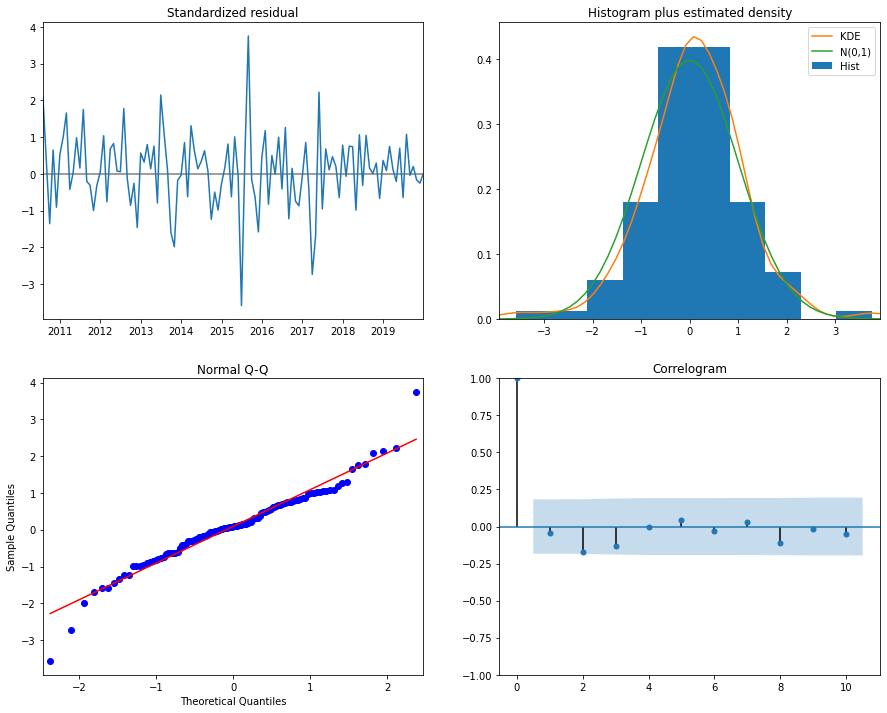

In [ ]:
best_model.plot_diagnostics(figsize=(15,12))
plt.plot()

**예측**

단위근 검정을 통해 로그 차분값이 안정적이라고 판단함.

이를 통해 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


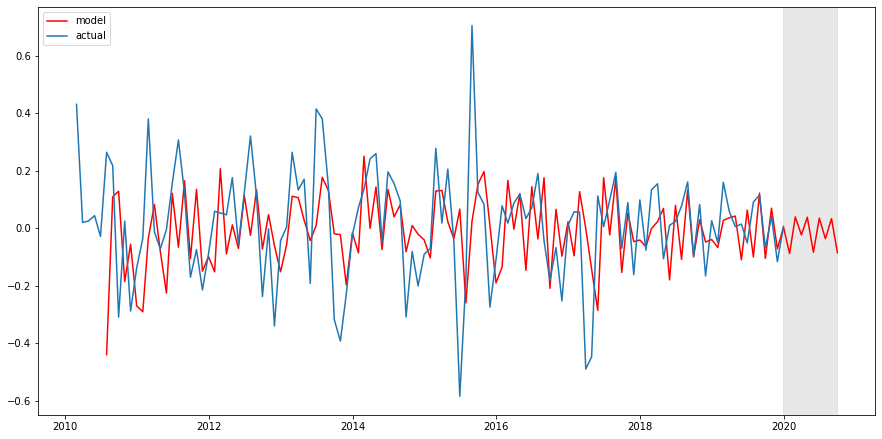

In [ ]:
pros_data['arima_model'] = best_model.fittedvalues
pros_data['arima_model'][:4+1] = np.NaN
forecast = best_model.predict(start=pros_data.shape[0], end=pros_data.shape[0] + 8)
forecast = pros_data['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='model')
plt.axvspan(pros_data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(pros_data['Log_diff'], label='actual')
plt.legend()
plt.show()

In [ ]:
forecast_C = np.zeros((len(forecast[-9:])))
init_diff = pros_data.iloc[-1]['Log']
for i in range(forecast_C.shape[0]):
    init_diff += forecast[(-9 + i)]
    forecast_C[i] = init_diff

In [ ]:
forecast_C = np.exp(forecast_C)

In [ ]:
PreC = np.array(pros_data['Count'])

In [ ]:
PreC = np.append(PreC, forecast_C).astype(int)

In [ ]:
PreC = np.insert(PreC, 0, values = China_Time_Series.iloc[0]['Count'])

In [ ]:
China_Time_Series['Count']

2010-01-31     93535
2010-02-28    143944
2010-03-31    146838
2010-04-30    150517
2010-05-31    157239
               ...  
2020-05-31      6375
2020-06-30      6343
2020-07-31     11143
2020-08-31     17160
2020-09-30     16157
Freq: M, Name: Count, Length: 129, dtype: int64

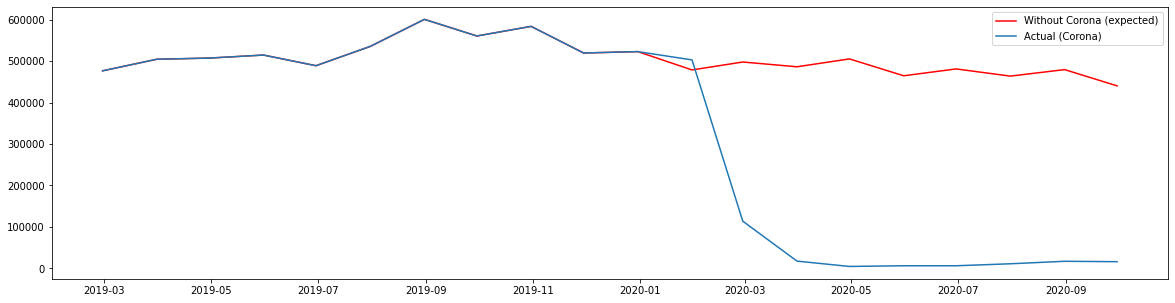

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(Monthly[-20:], PreC[-20:], color='r', label='Without Corona (expected)')
plt.plot(Monthly[-20:], China_Time_Series.iloc[-20:]['Count'], label='Actual (Corona)')
plt.legend()
plt.show()